# Bias Variance Tradeoff

Nipun Batra  
2024-01-09

<figure>
<a
href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/bias-variance.ipynb"><img
src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
<figcaption>Open In Colab</figcaption>
</figure>

In [202]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from latexify import latexify, format_axes
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

import pandas as pd
import ipywidgets as widgets


In [176]:
latexify(columns=2)

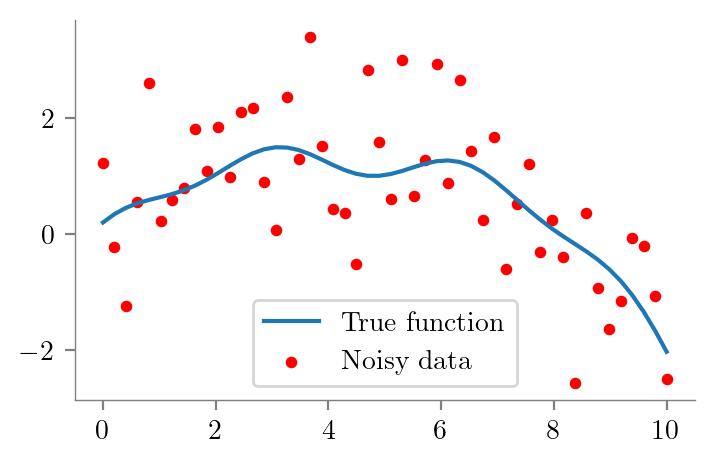

In [177]:
x_overall = np.linspace(0, 10, 50)
f_x = 0.2*np.sin(x_overall) + 0.2*np.cos(2*x_overall)+ 0.6*x_overall - 0.05*x_overall**2 - 0.003*x_overall**3

eps = np.random.normal(0, 1, 50)
y_overall = f_x + eps
plt.plot(x_overall, f_x, label = 'True function')
plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
format_axes(plt.gca())
plt.legend()

In [178]:
def fit_plot_tree(x, y, depth=1, extra=None):
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(x.reshape(-1, 1), y)
    y_pred = dt.predict(x.reshape(-1, 1))
    plt.figure()

    plt.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    label = r"$\hat{f}$" if not extra else fr"$\hat{{f}}_{{{extra}}}$"

    plt.plot(x, y_pred, label = label, lw=2)

    format_axes(plt.gca())
    plt.legend()
    plt.title(f"Depth = {depth}")
    return dt

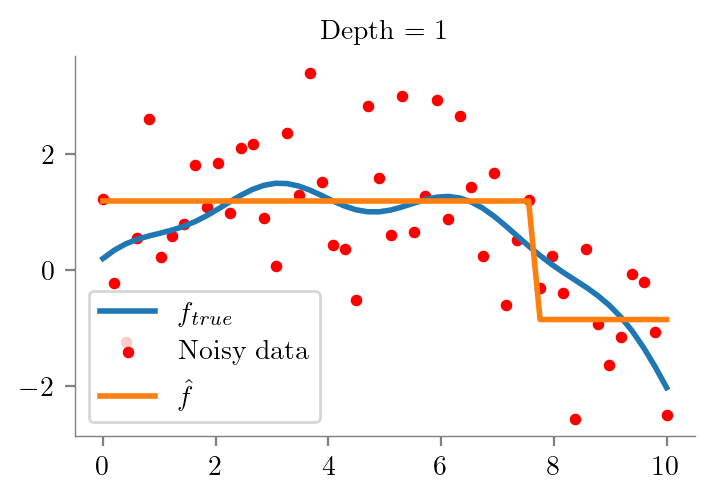

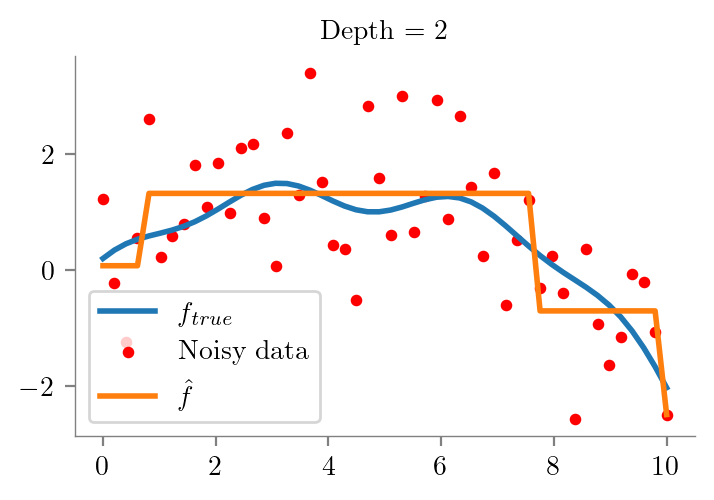

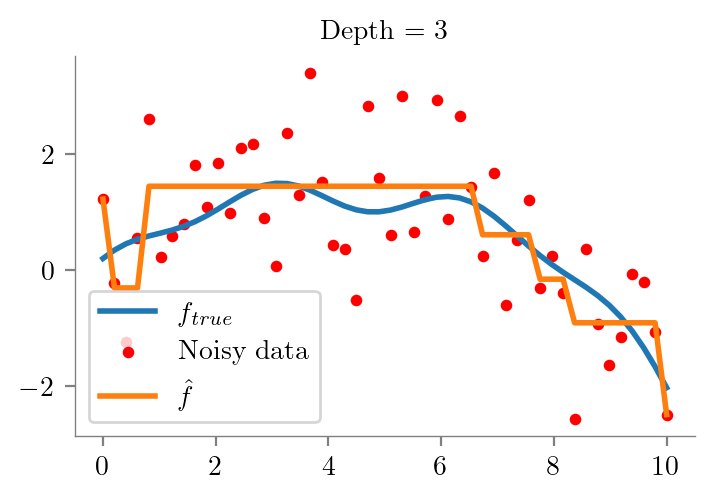

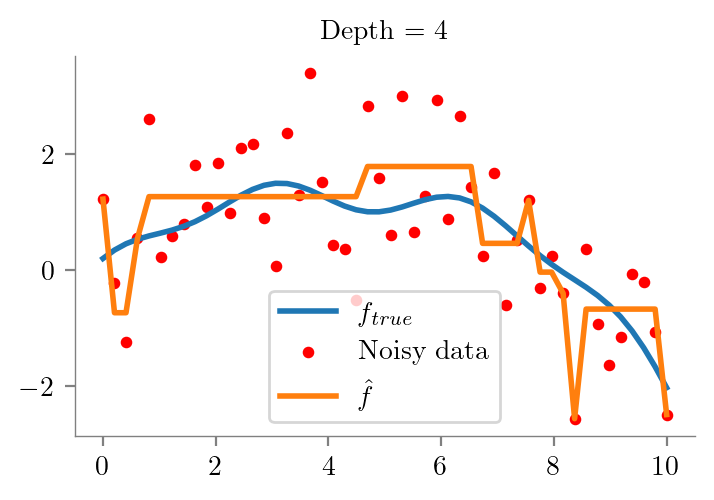

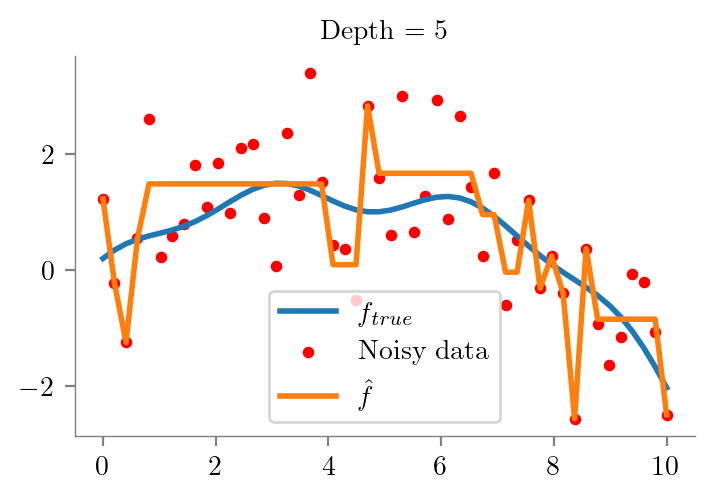

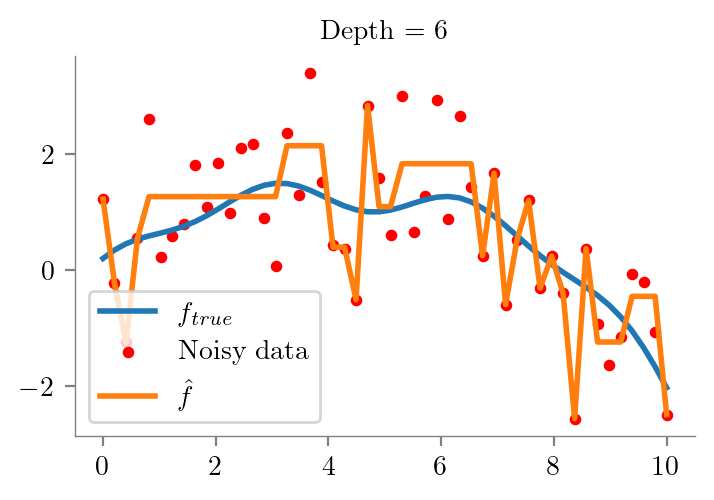

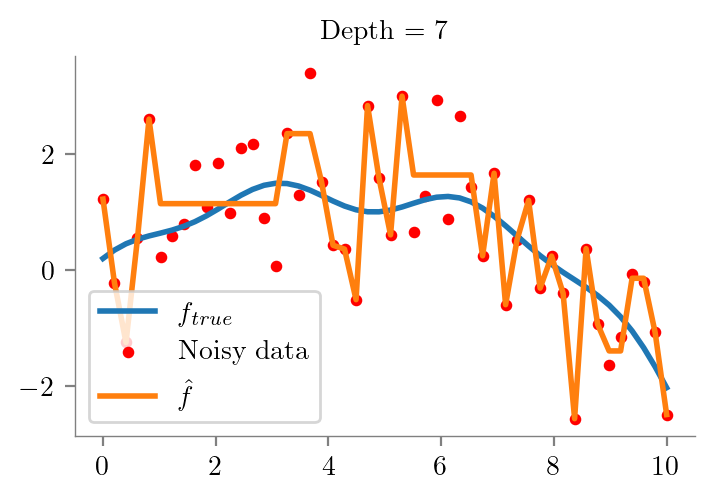

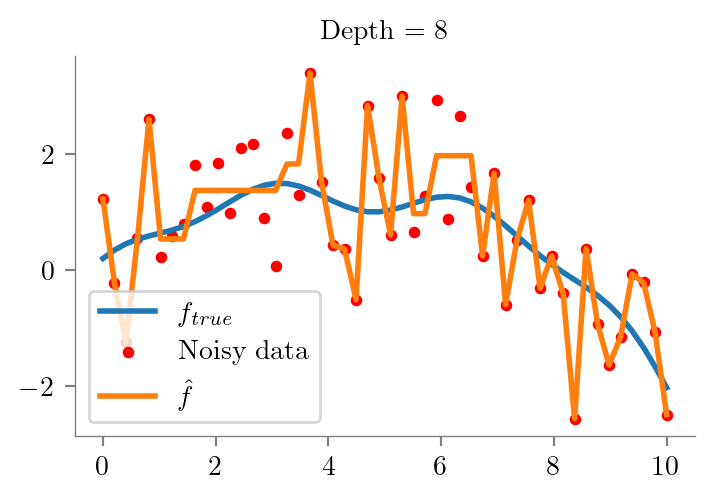

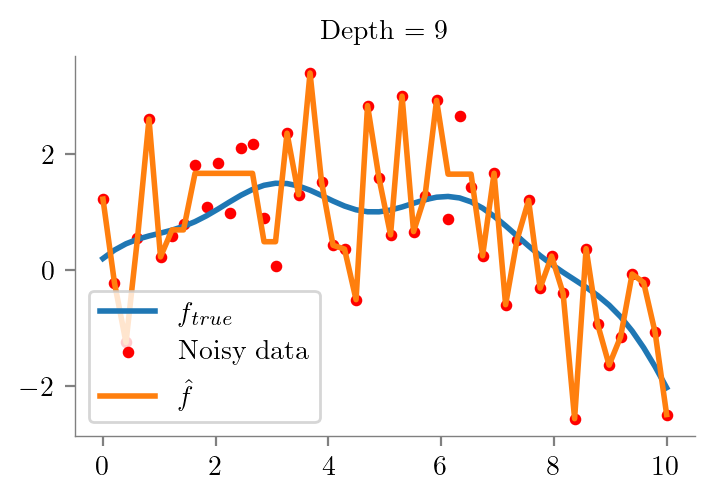

In [179]:
for i in range(1, 10):
    fit_plot_tree(x_overall, y_overall, i)

In [208]:
def fit_plot_polynomial(x, y, degree=1, extra=None, ax=None):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    if ax is None:
        fig, ax = plt.subplots()

    ax.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    ax.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    label = r"$\hat{f}$" if not extra else fr"$\hat{{f}}_{{{extra}}}$"

    ax.plot(x, y_pred, label = label, lw=2)

    format_axes(ax)
    ax.legend()
    ax.set_title(f"Degree = {degree}")
    return model


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
 ('linearregression', LinearRegression())]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
 ('linearregression', LinearRegression())]) PolynomialFeatures PolynomialFeatures(degree=5) LinearRegression LinearRegression()

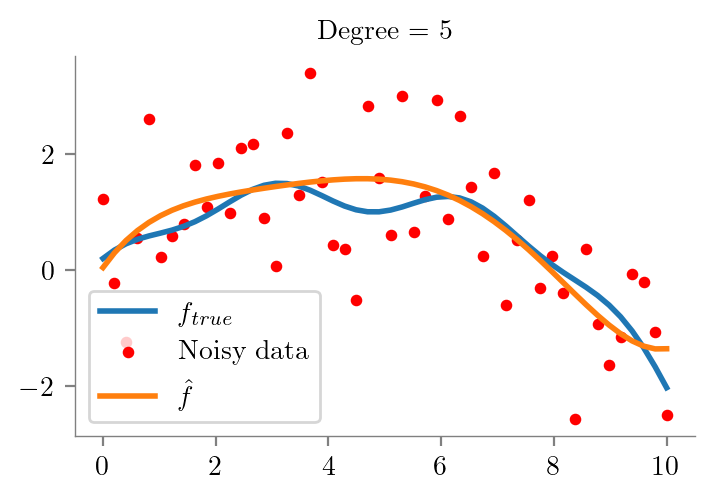

In [209]:
fit_plot_polynomial(x_overall, y_overall, 5)

In [221]:
def plot_degree(degree=1):
    regs = []
    fig, axes = plt.subplots(5, 2, figsize=(8, 12), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        idx = np.random.choice(np.arange(1, 49), 15, replace=False)
        idx = np.concatenate([[0], idx, [49]])
        idx.sort()
        x = x_overall[idx]
        y = y_overall[idx]
        regs.append(fit_plot_polynomial(x, y, degree=degree, extra=i, ax=ax))
        # remove legend
        #ax.legend().remove()
        ax.scatter(x_overall[idx], y_overall[idx], s=50, c='b', label='Sample', alpha=0.1)
        ax.legend()
    
    plt.tight_layout()
    plt.show()
    
    return regs


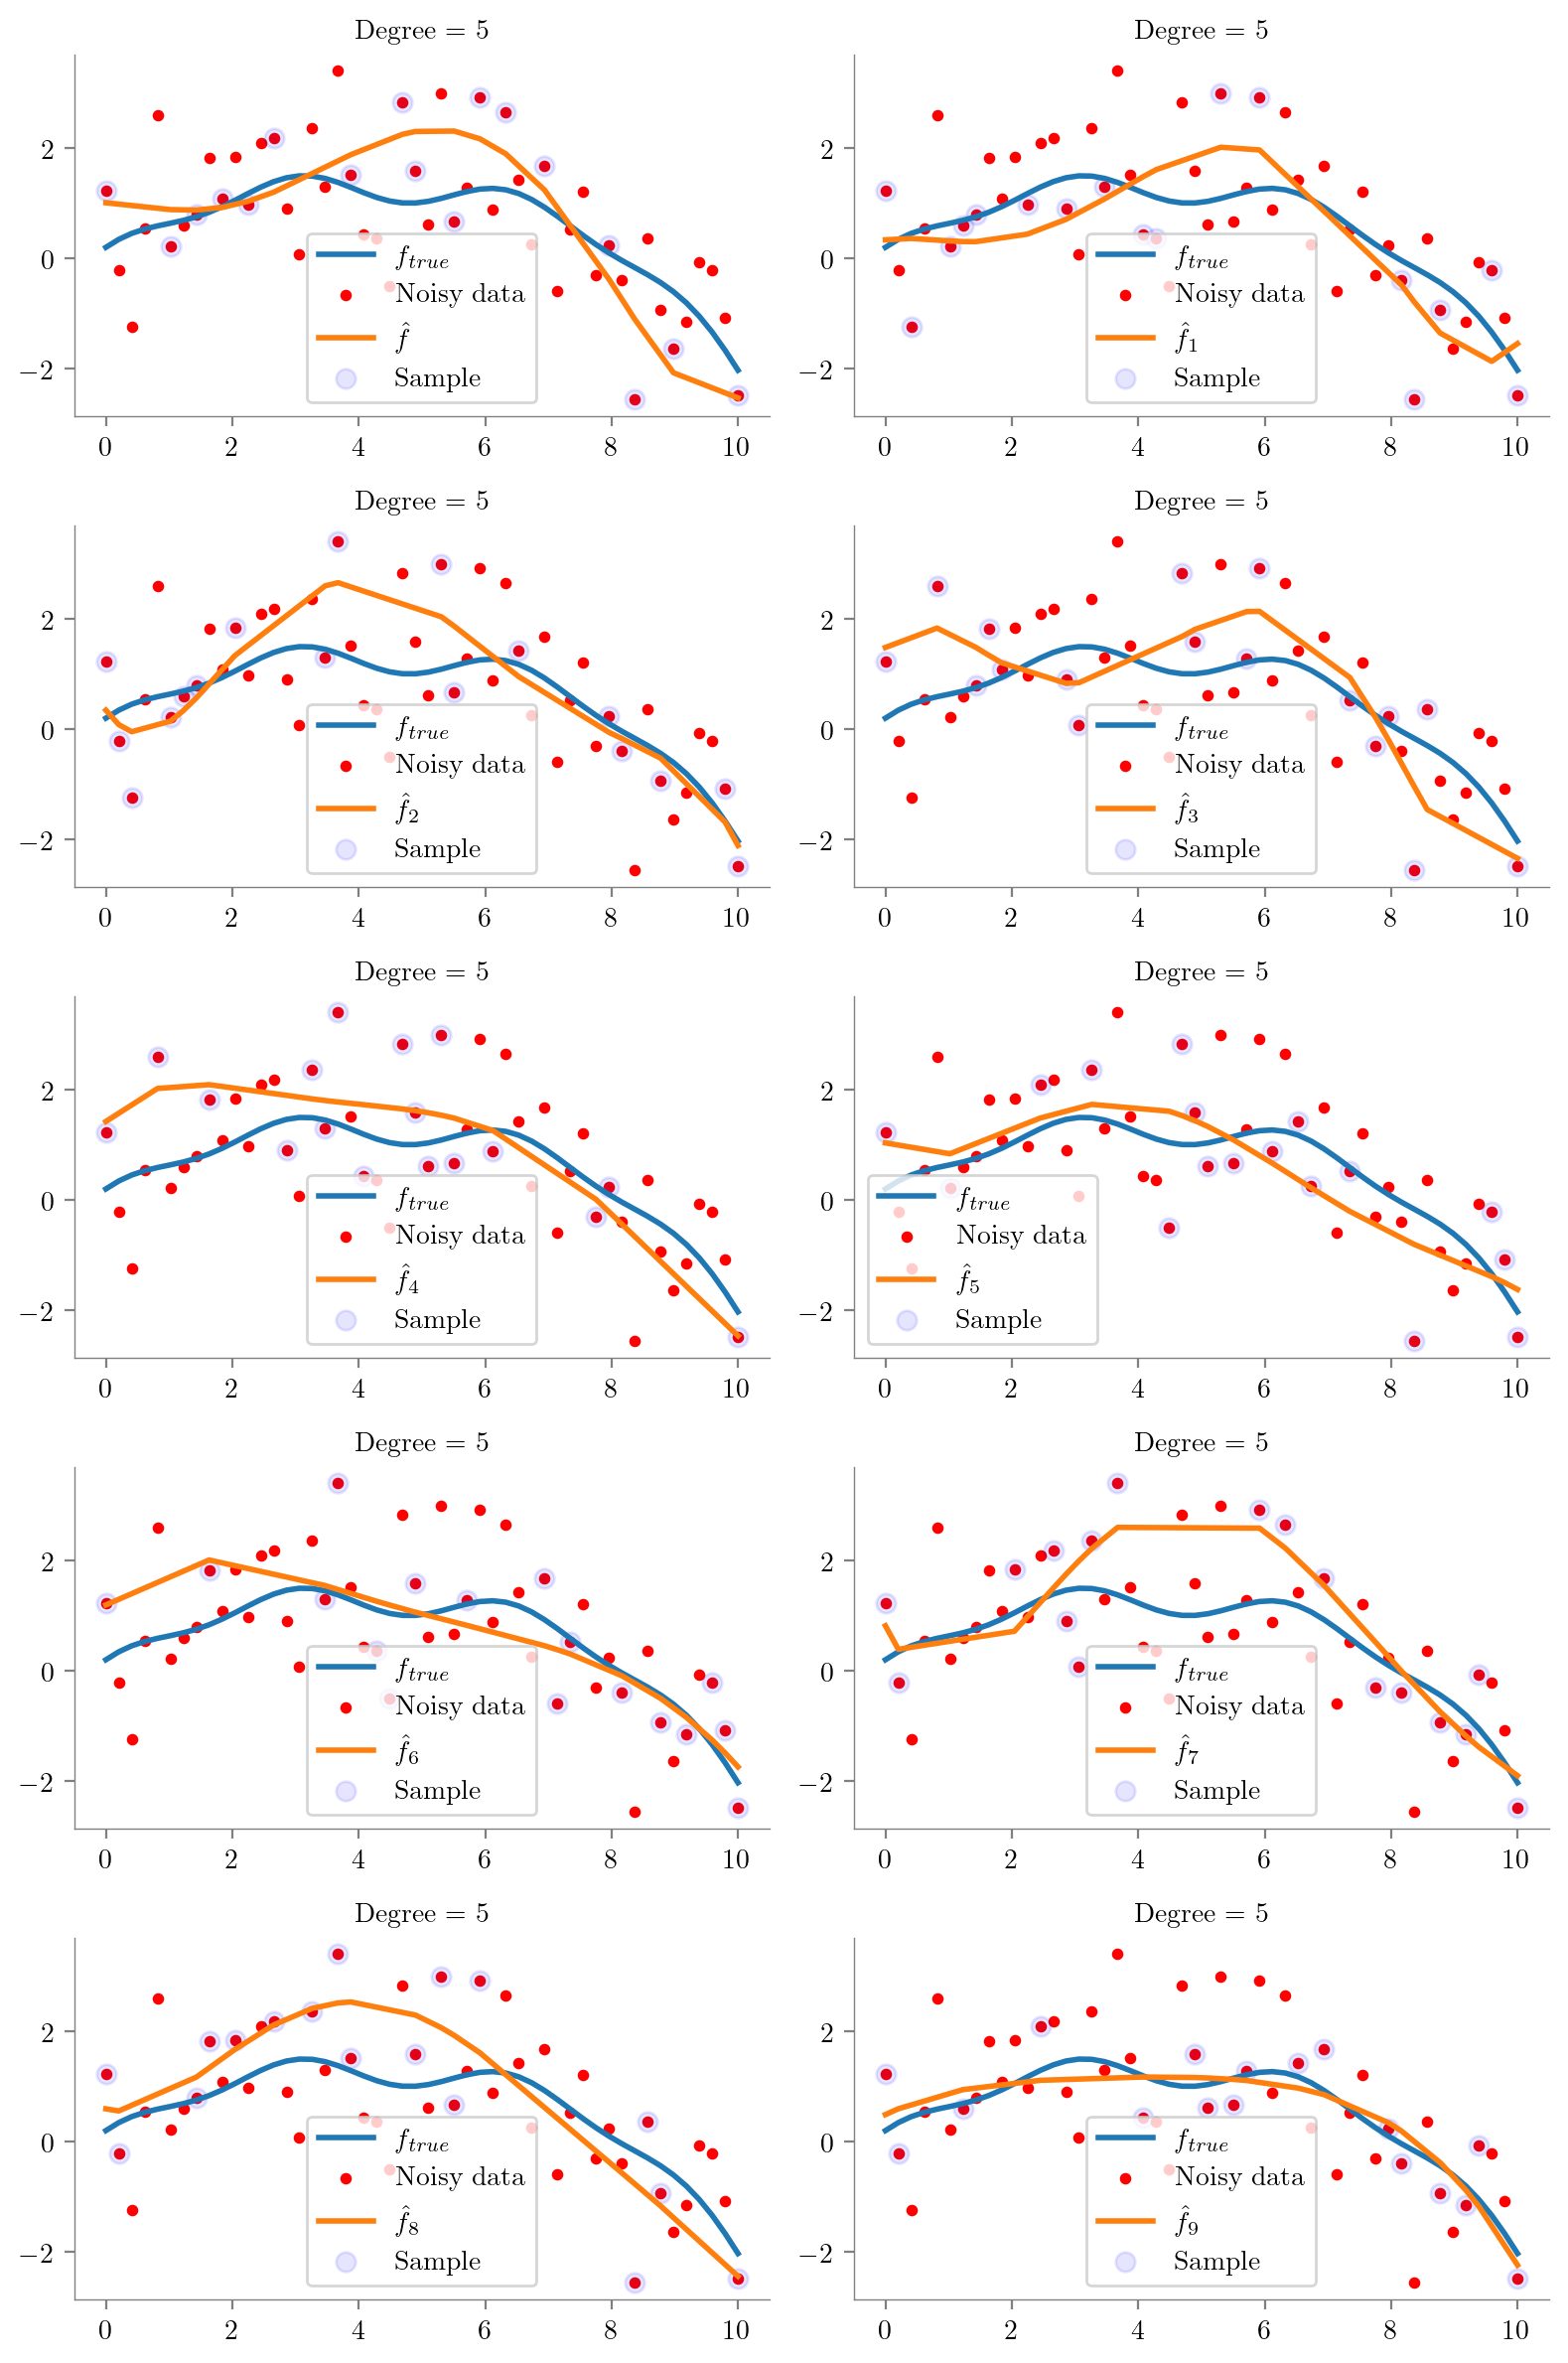

In [222]:
_ = plot_degree(5)

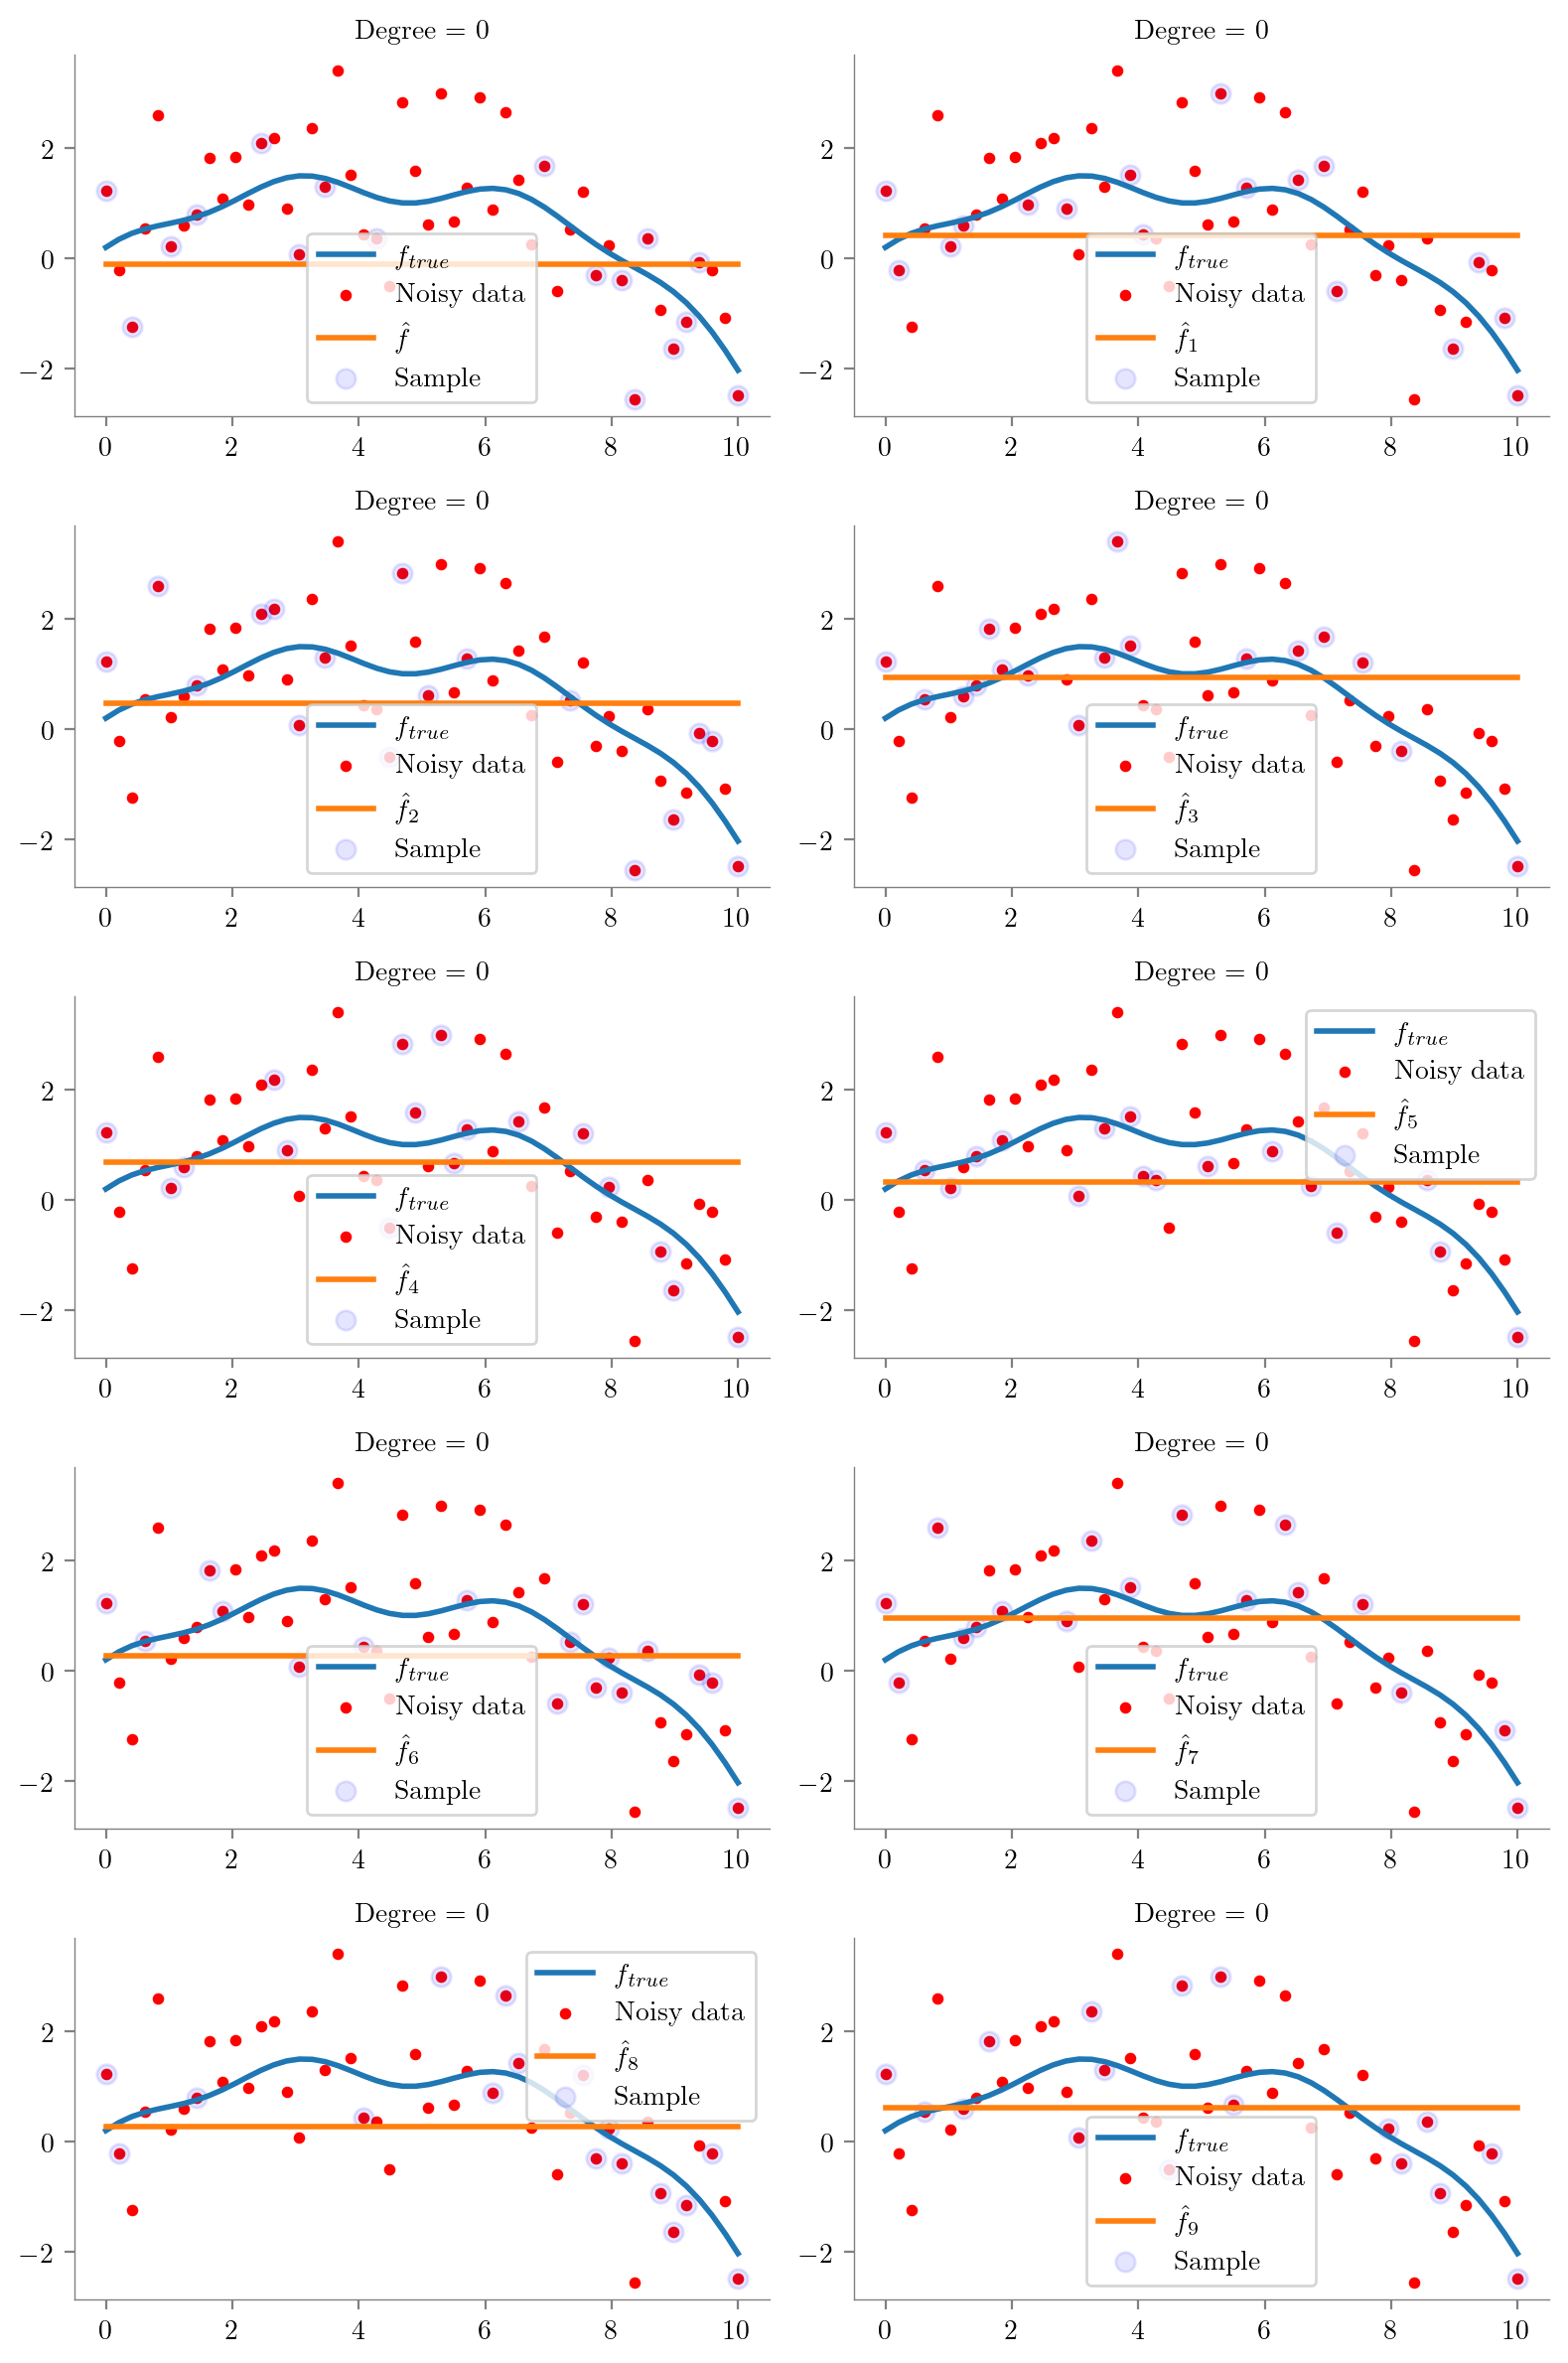

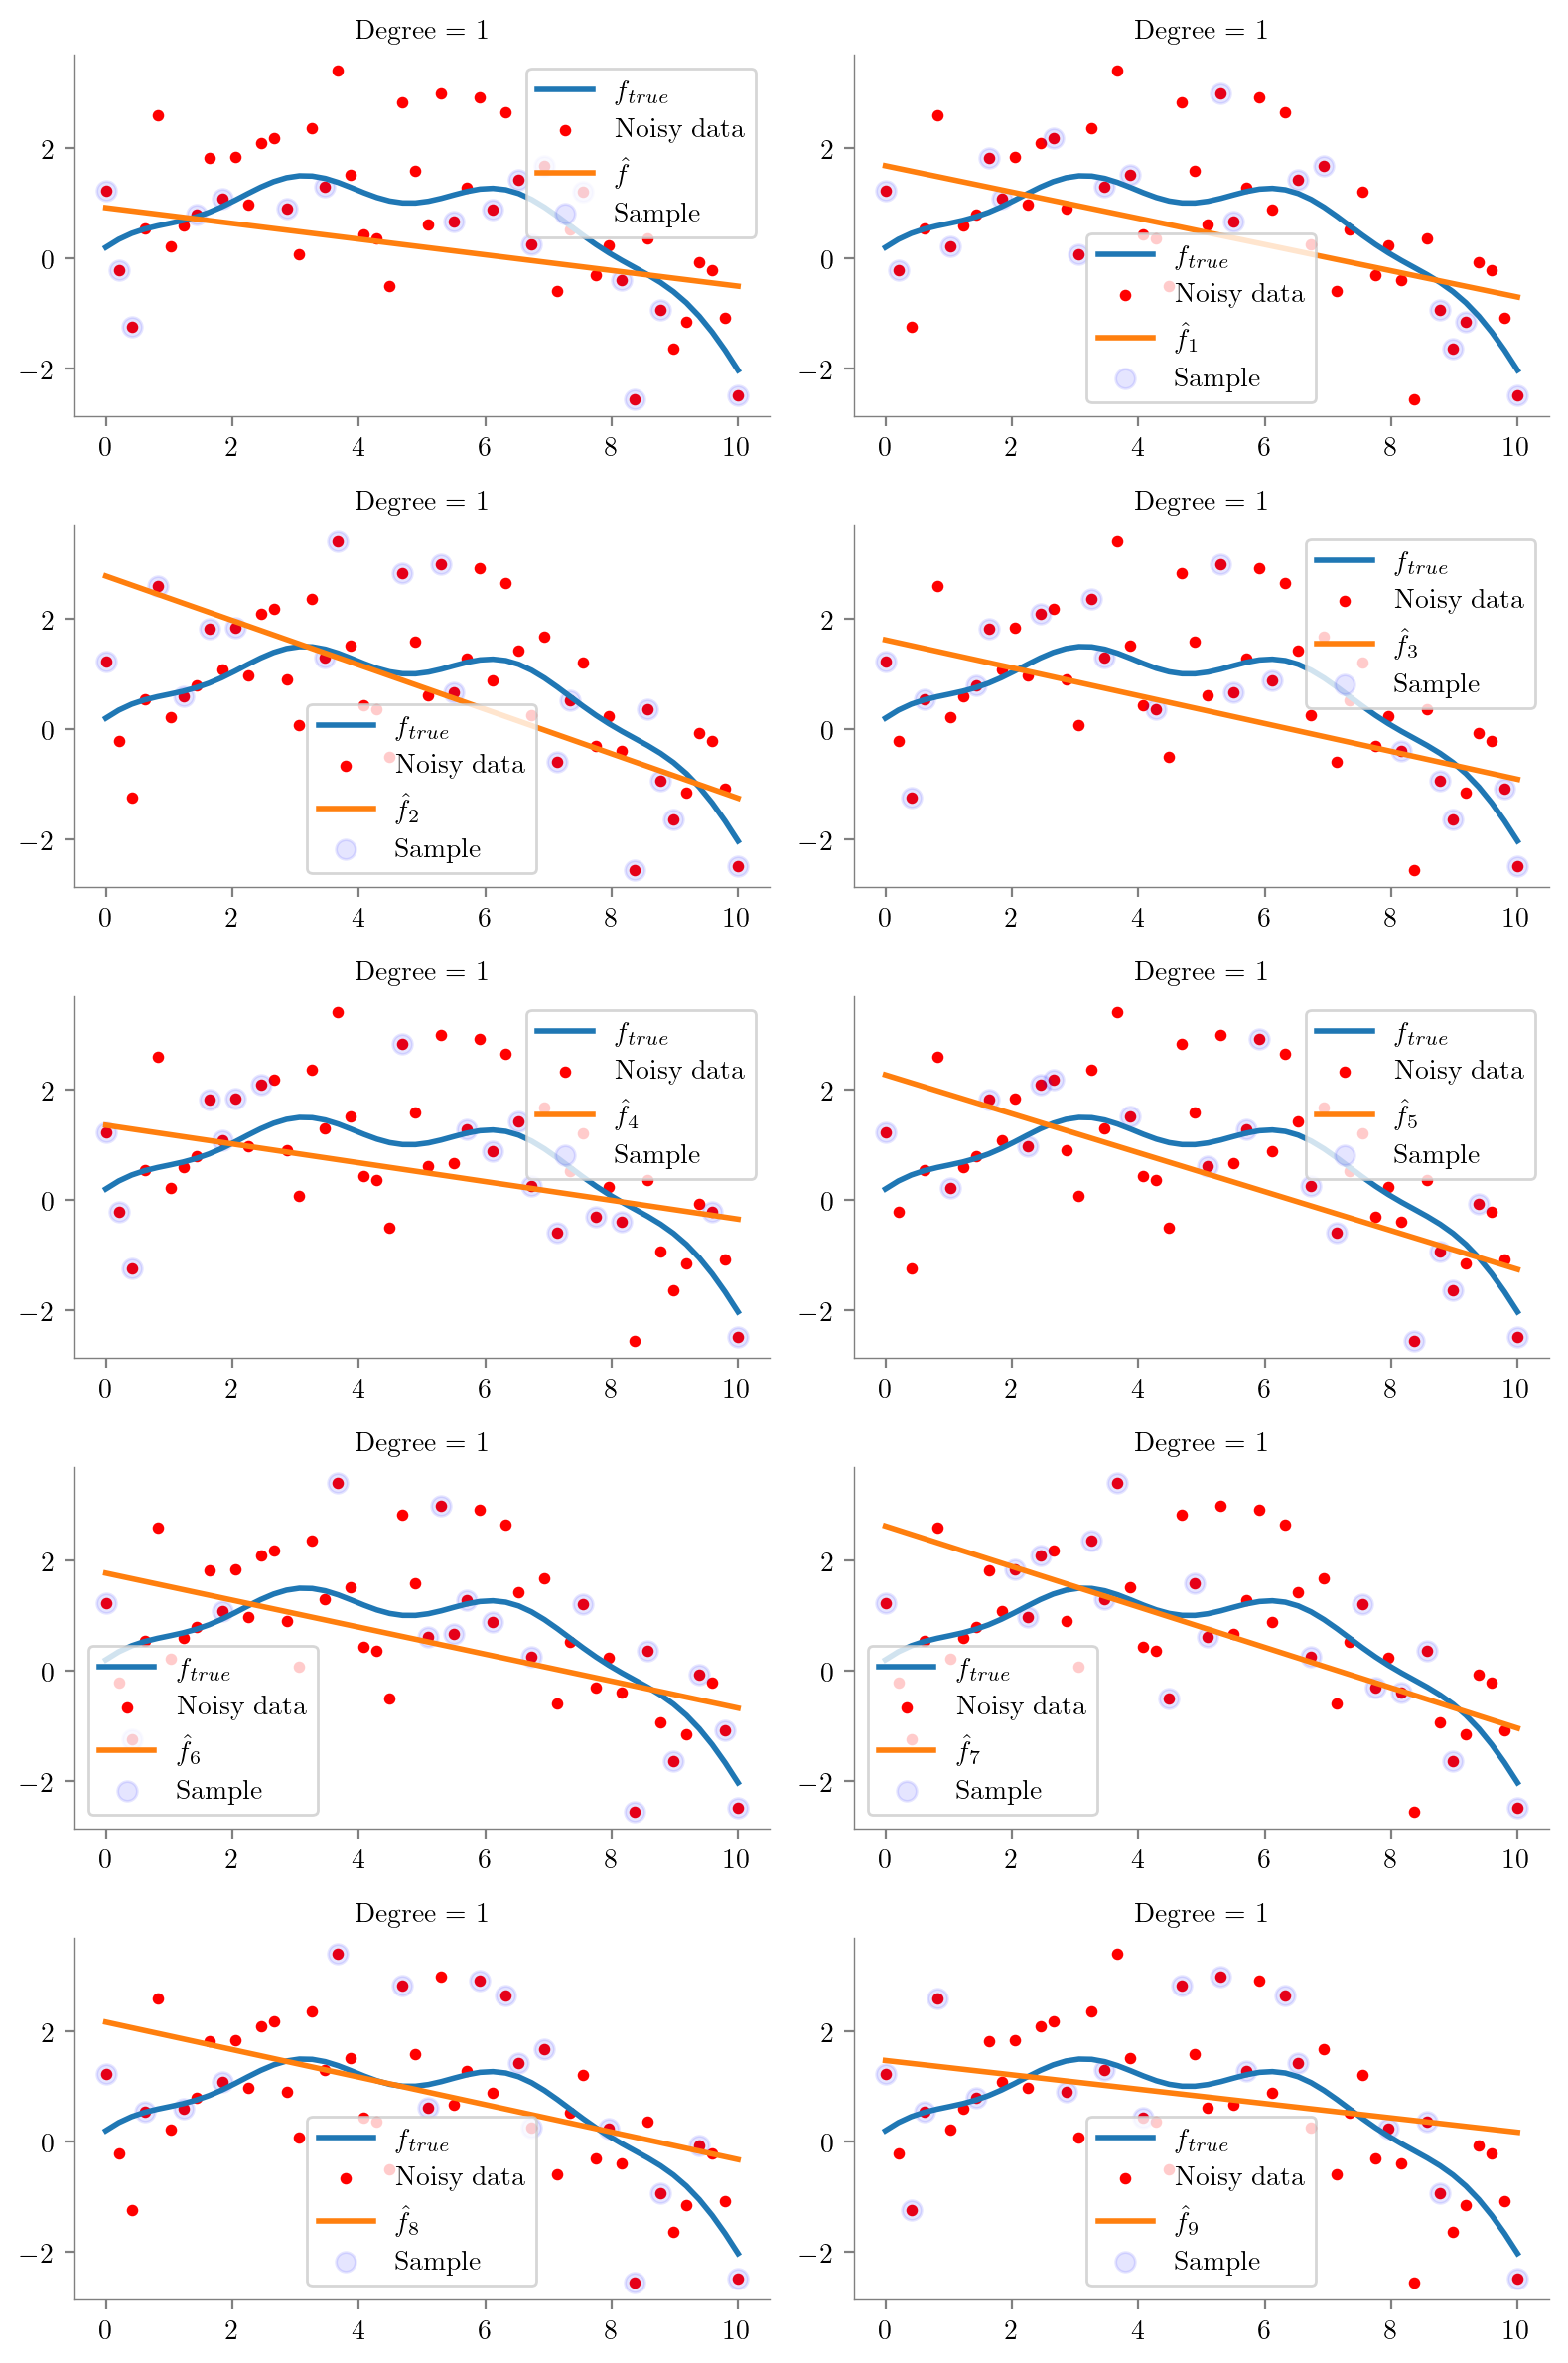

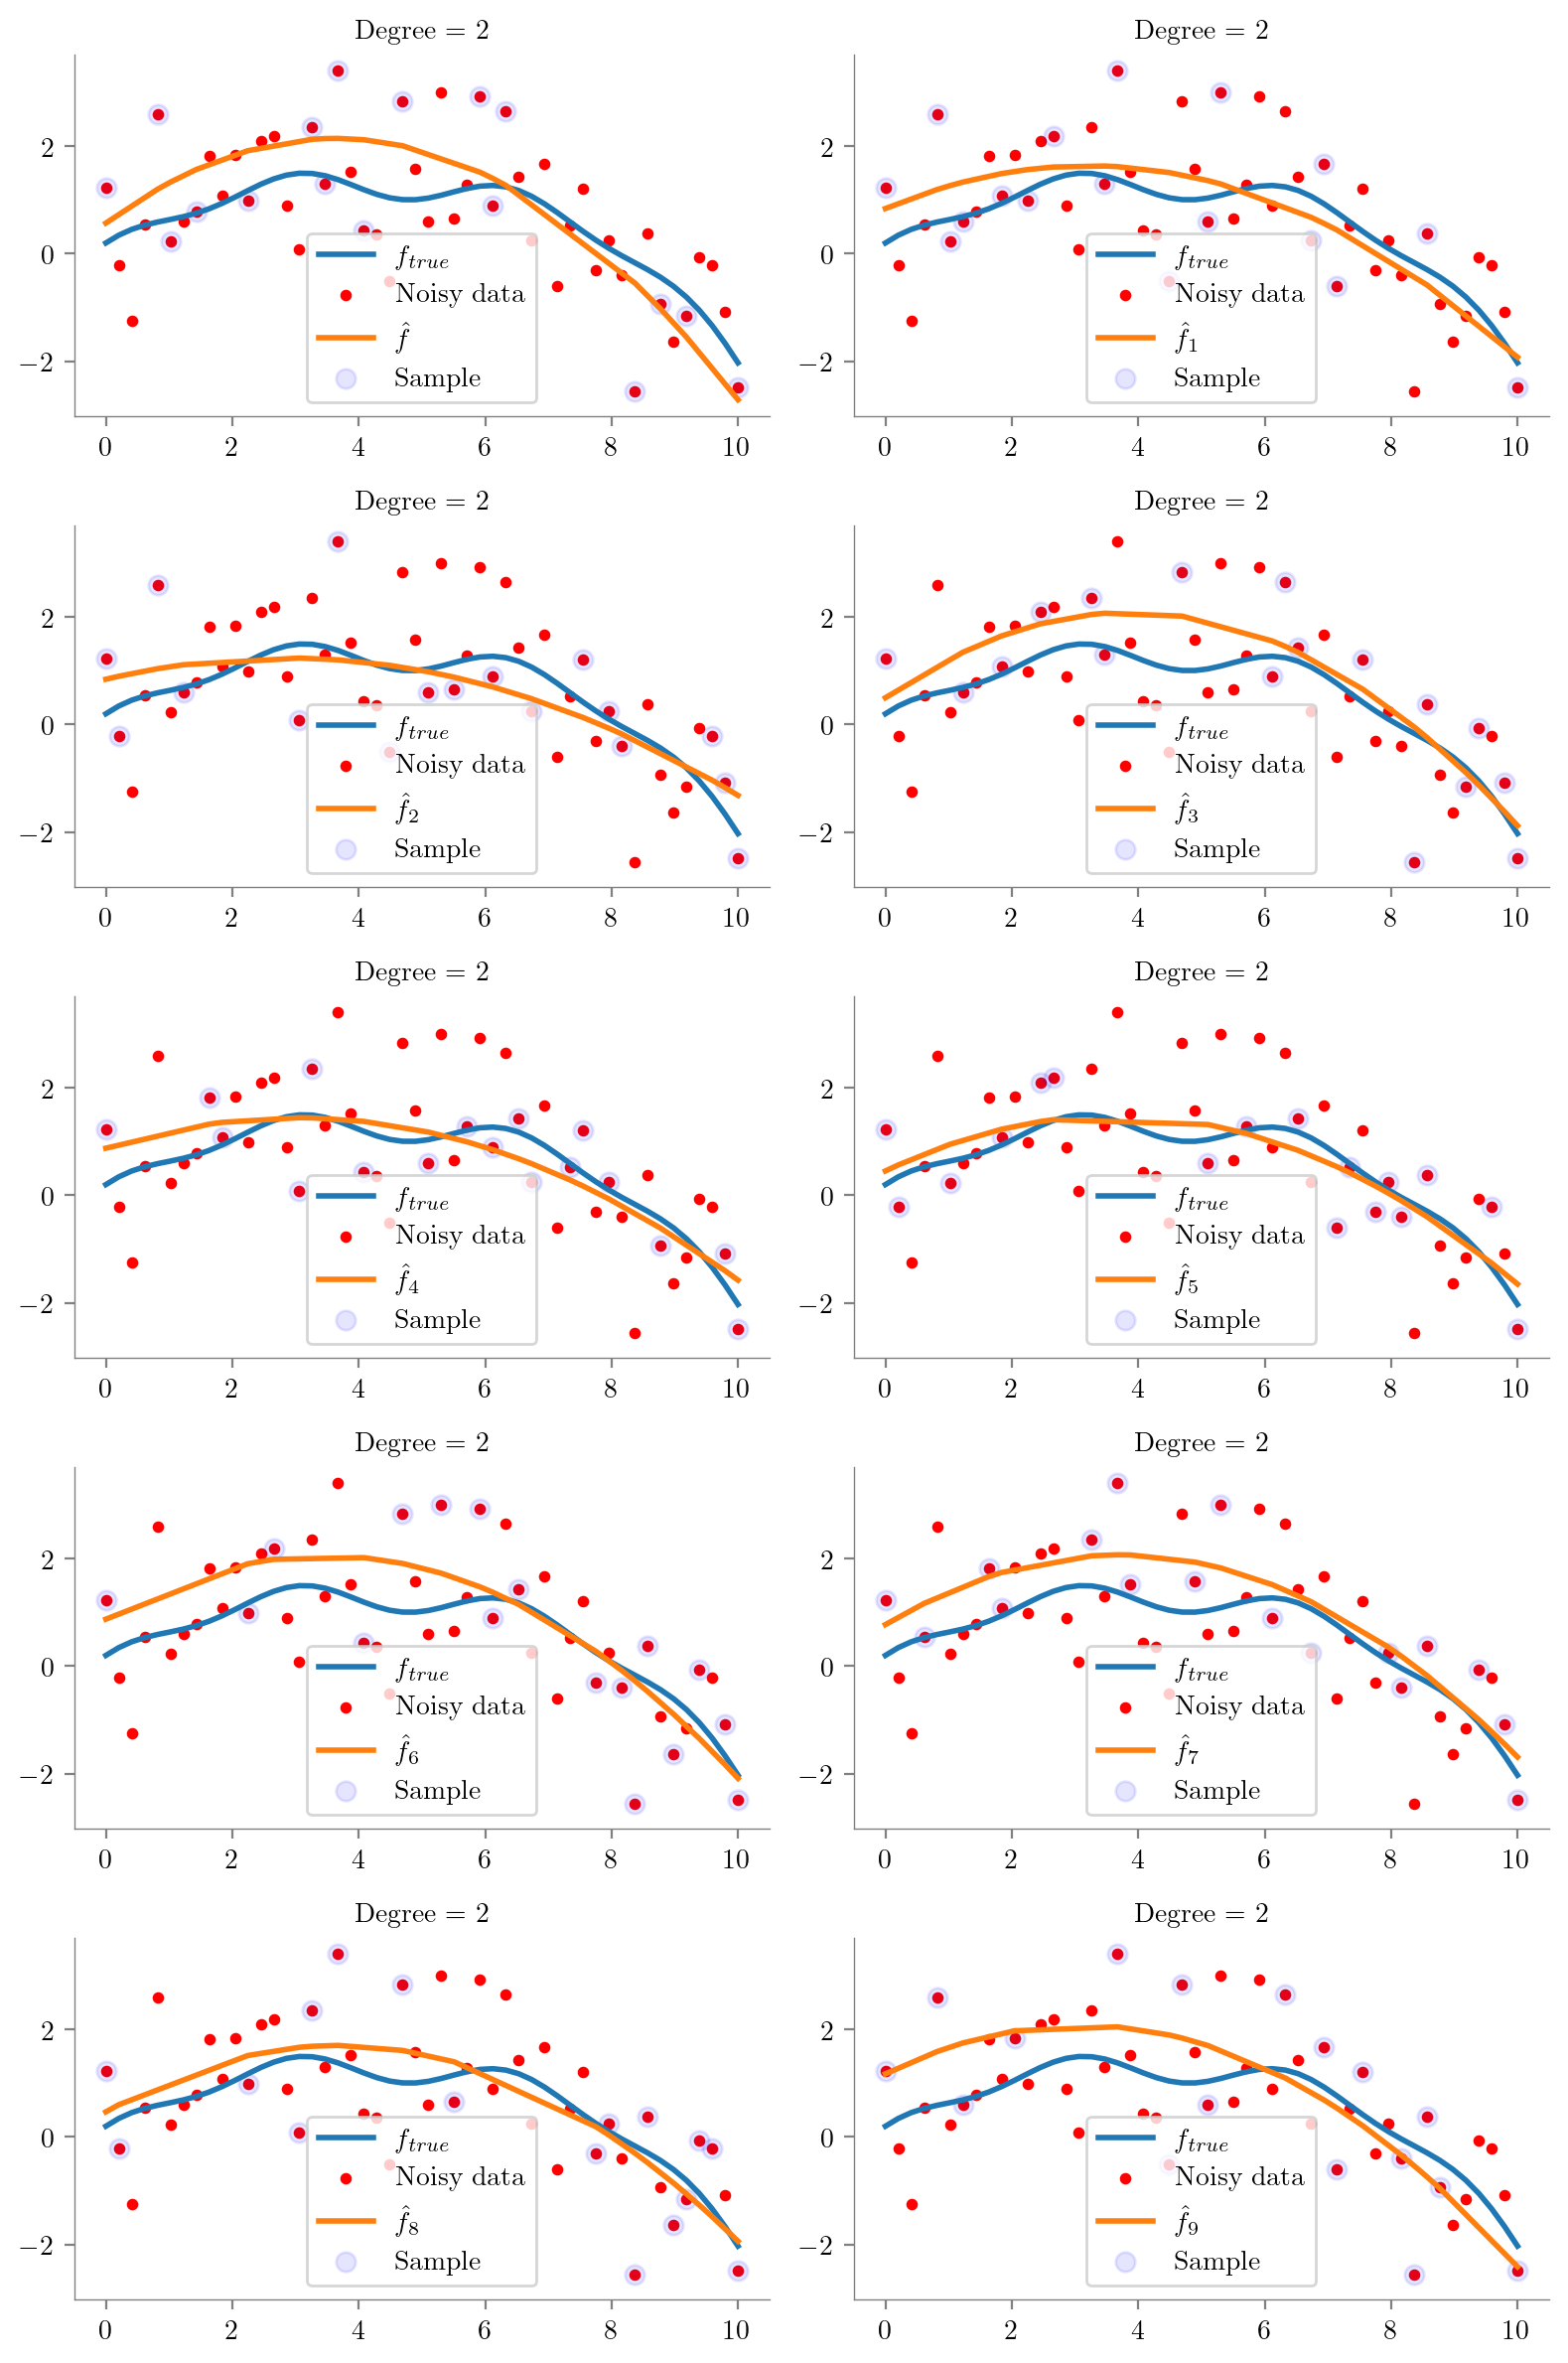

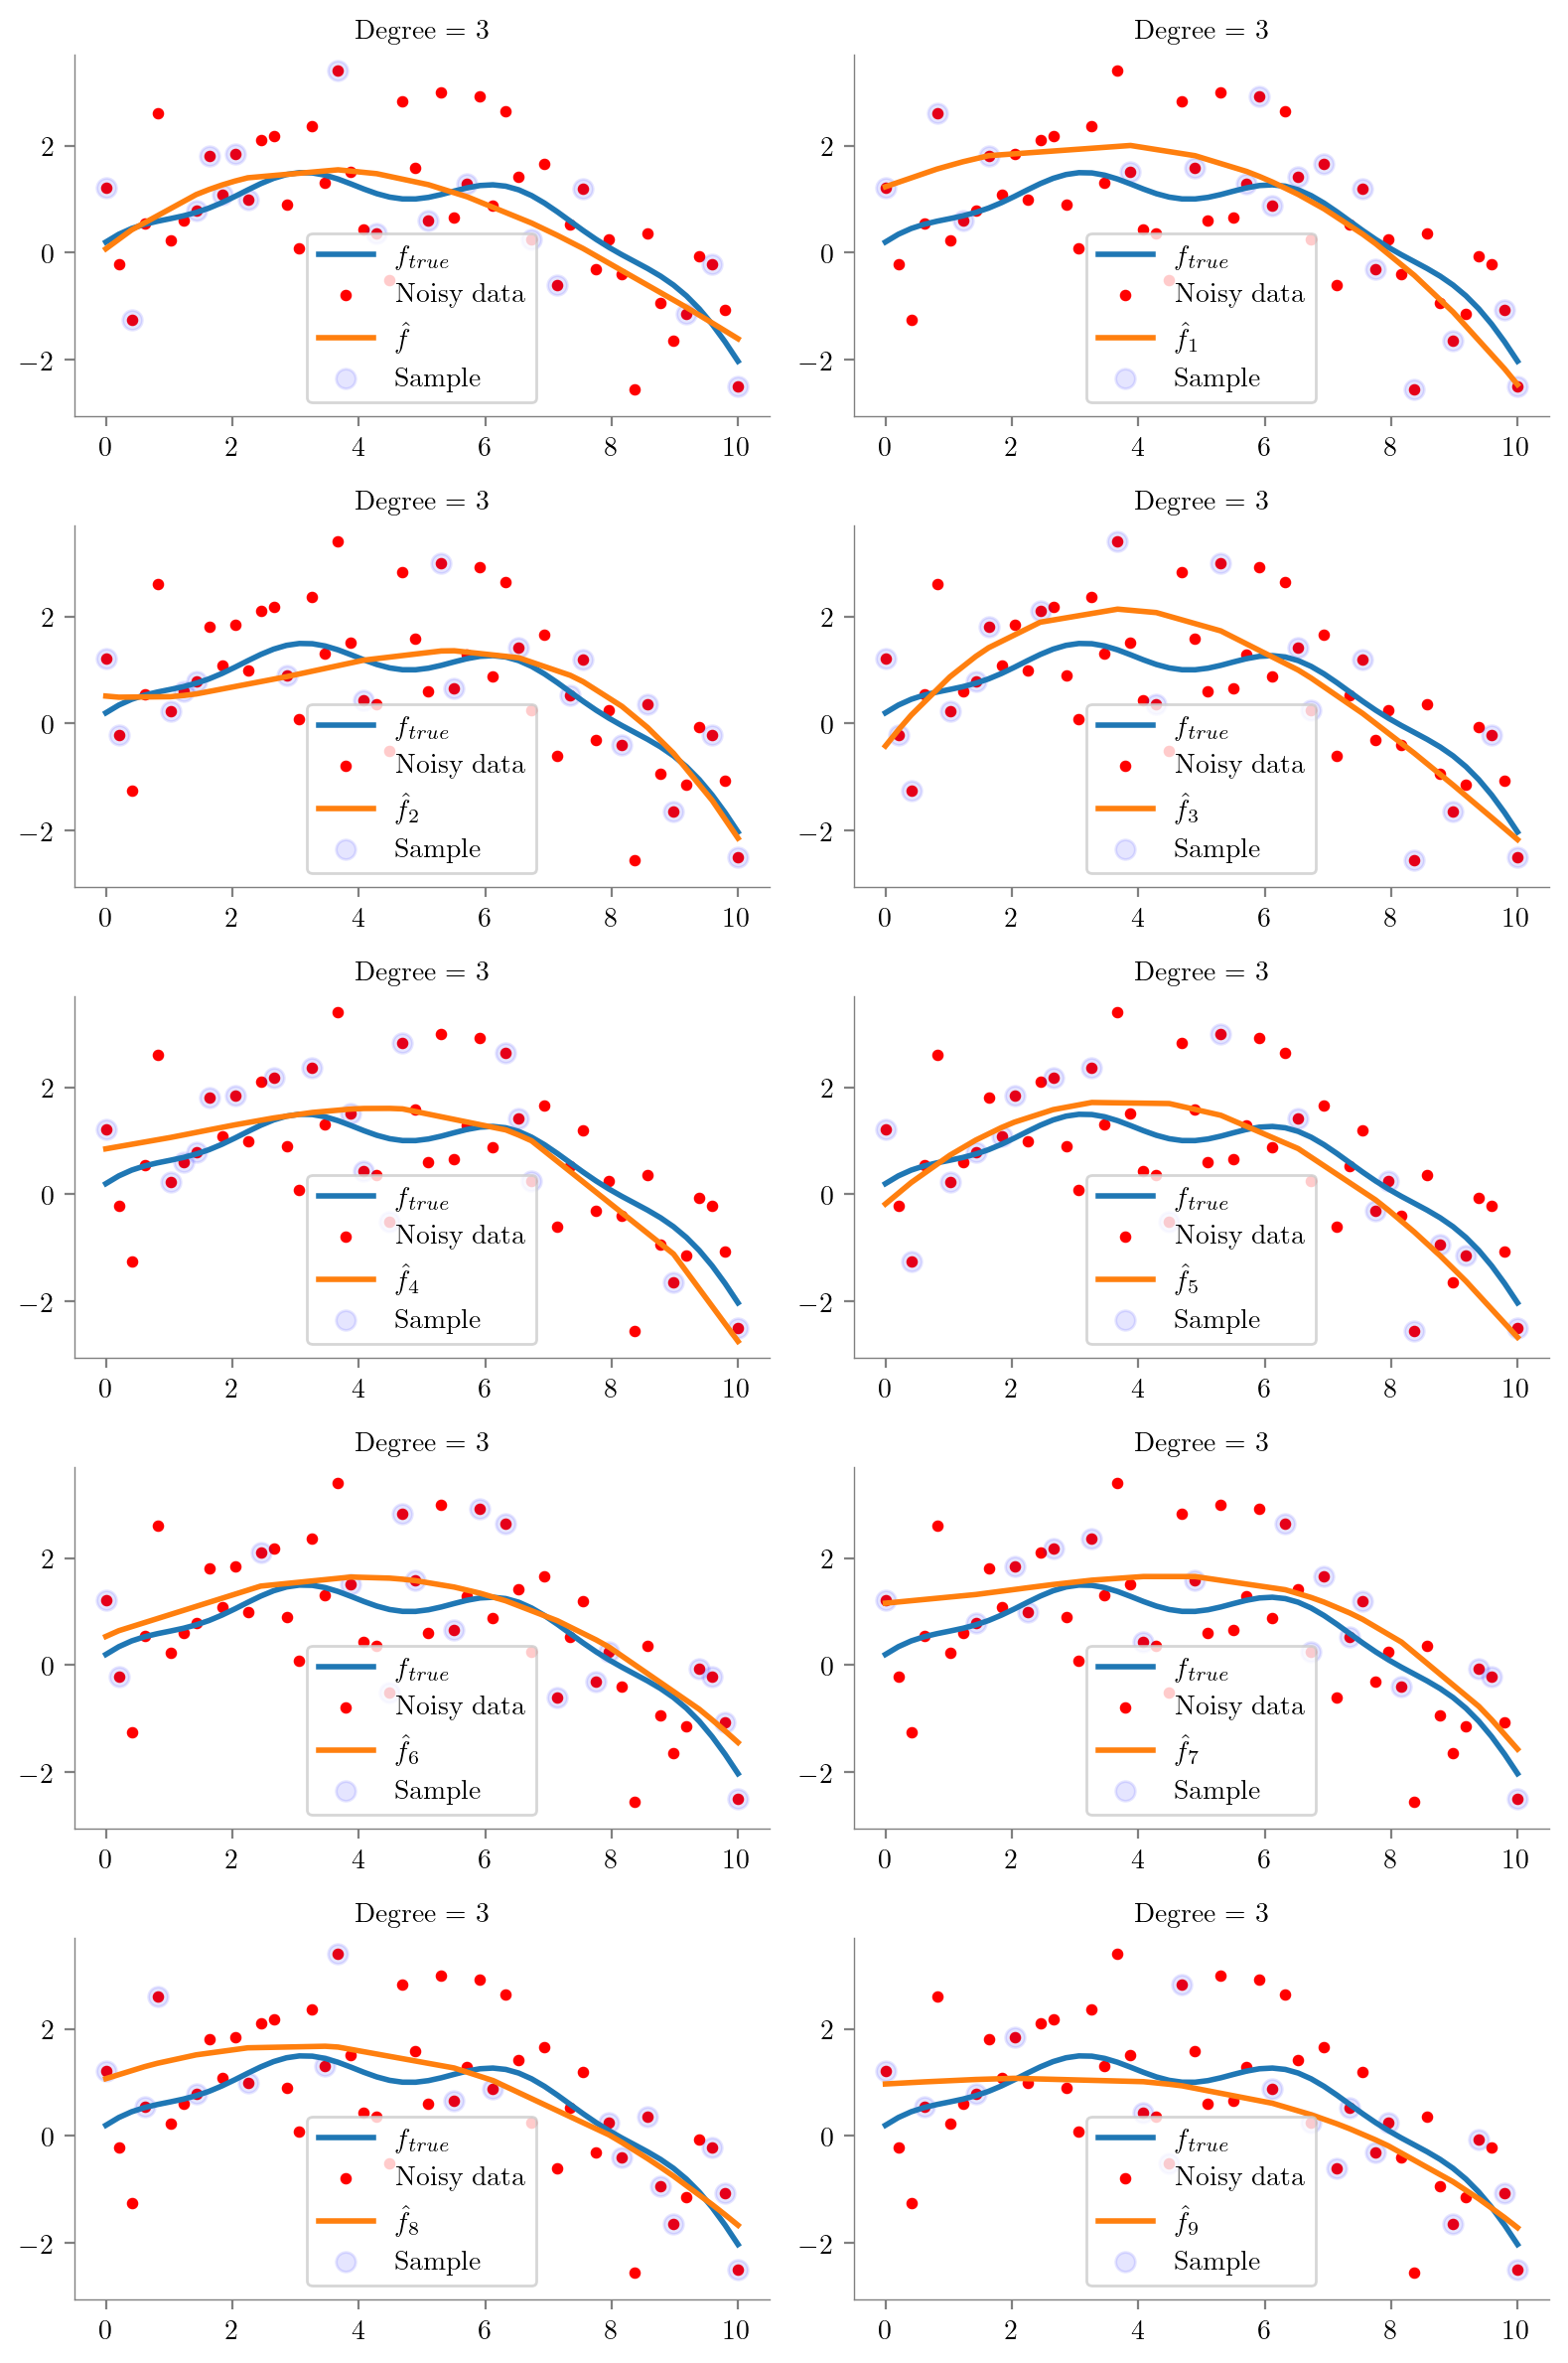

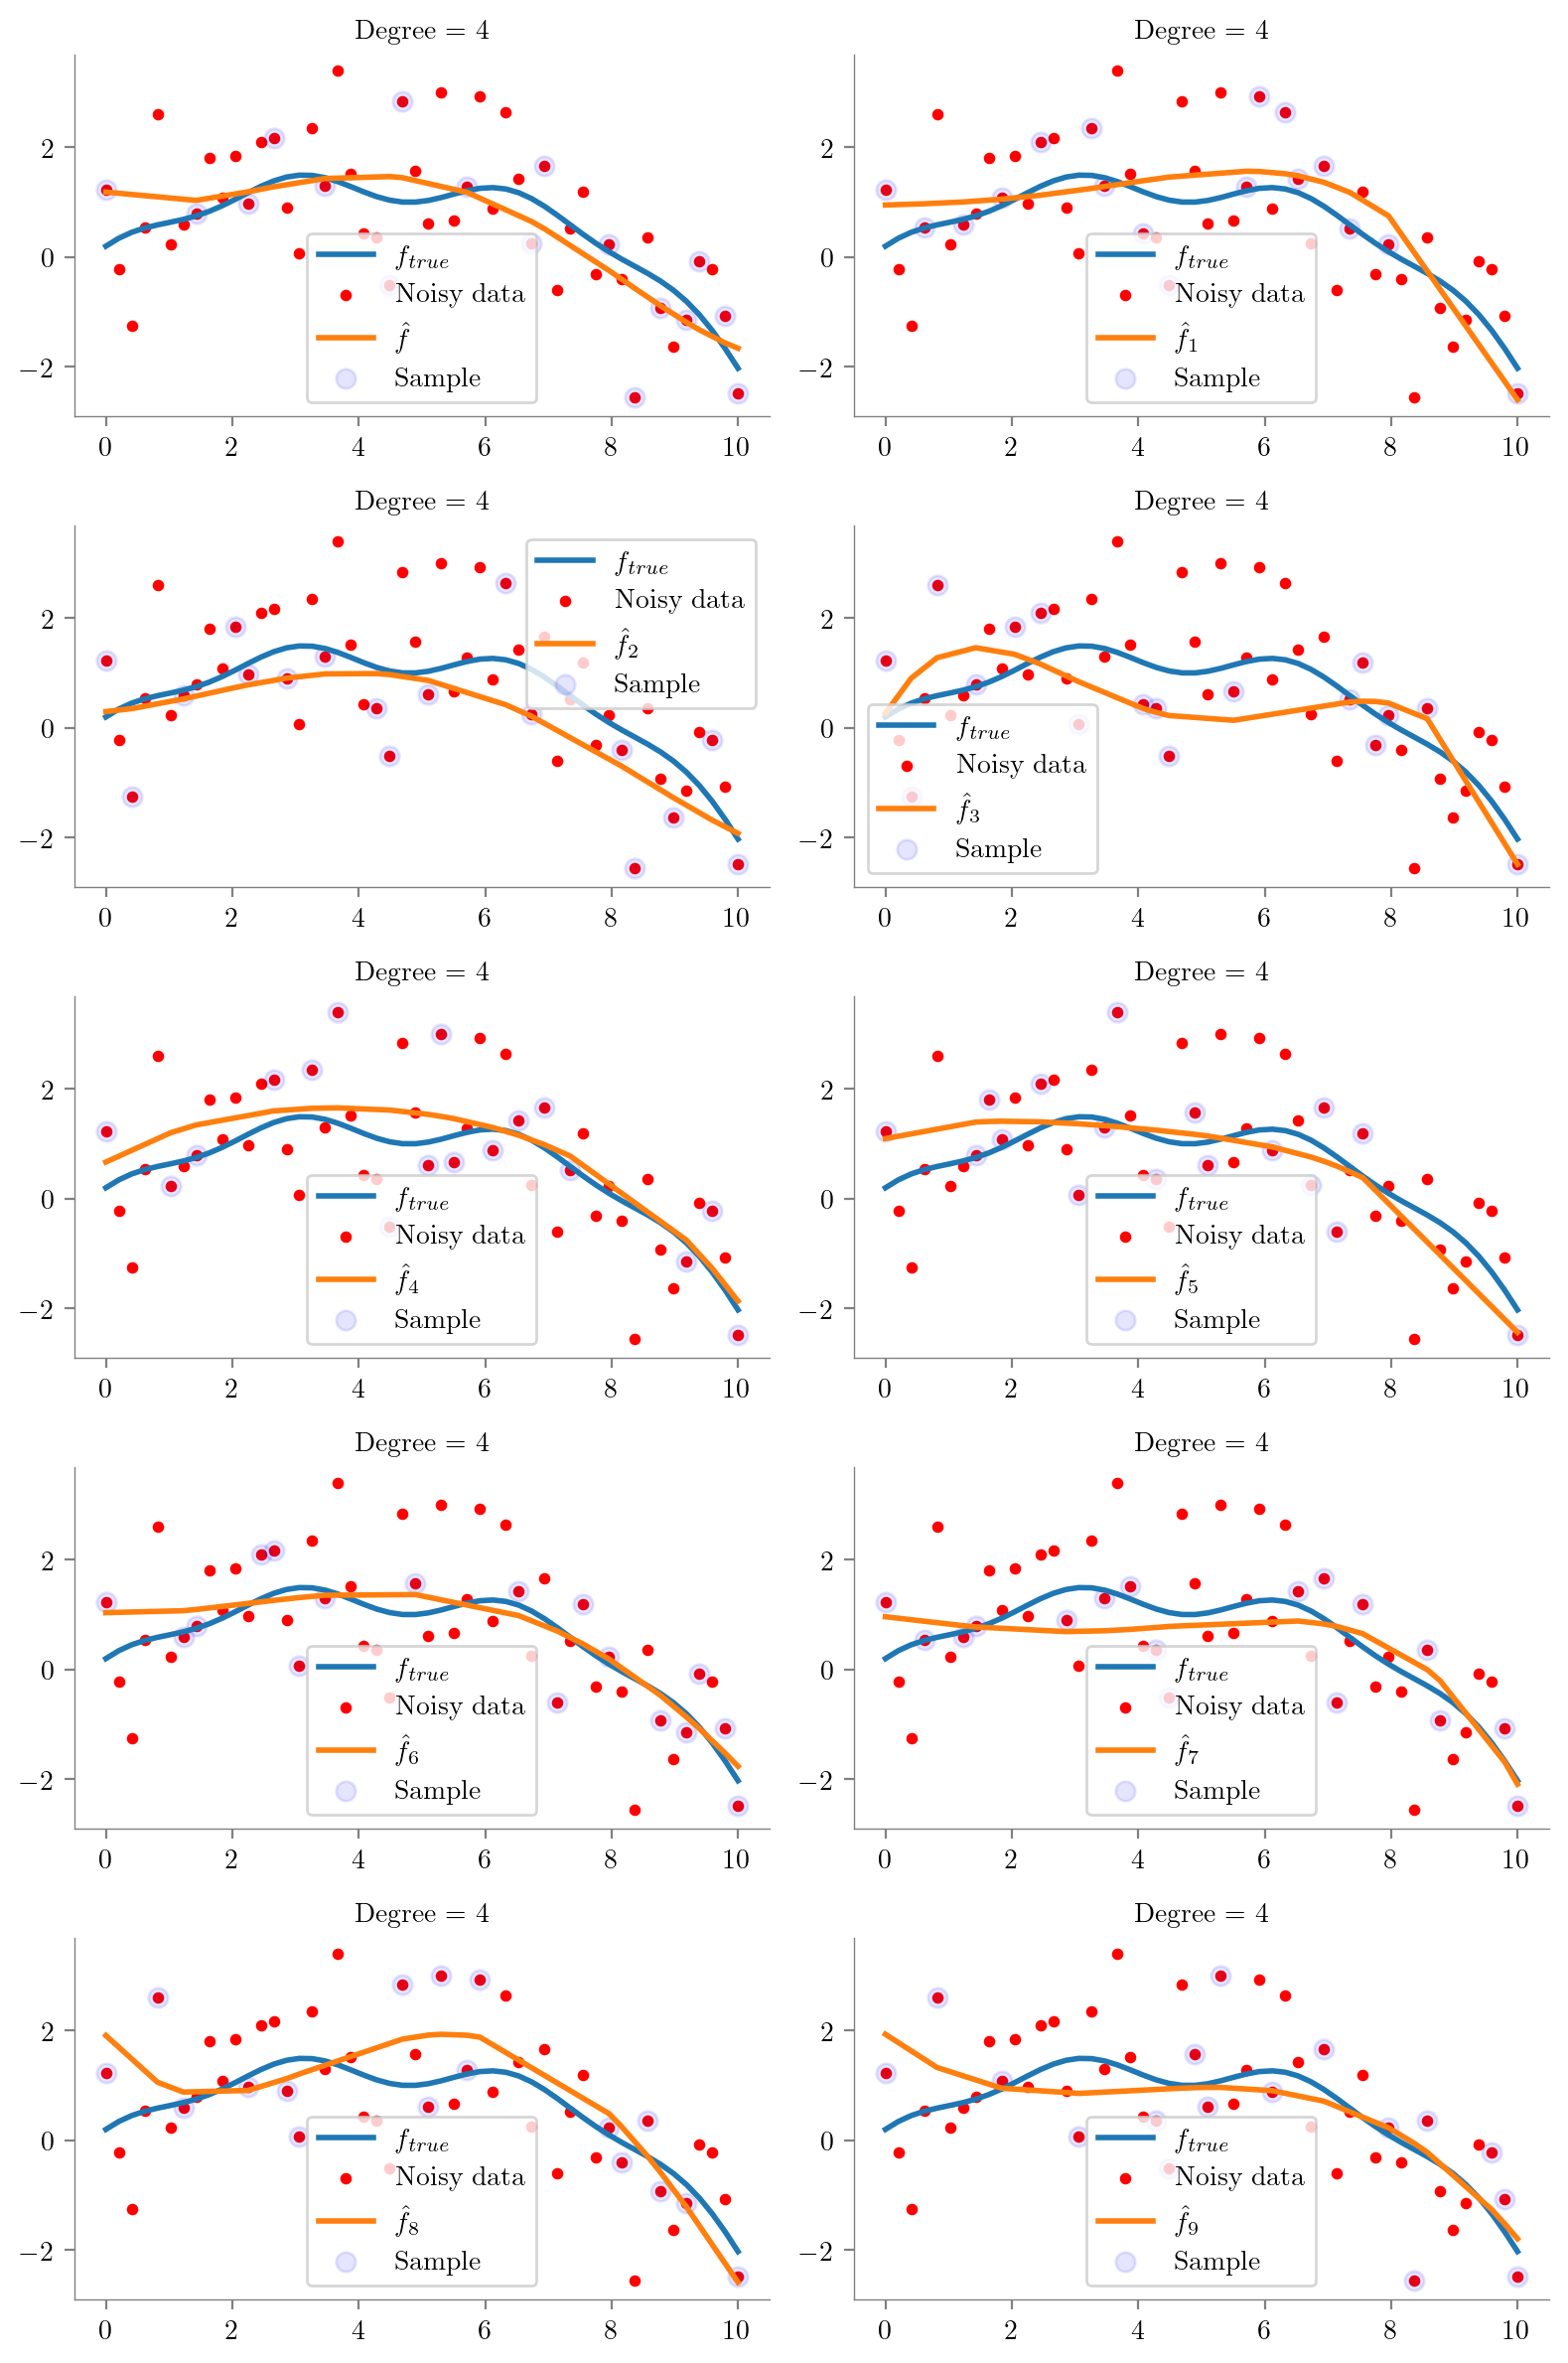

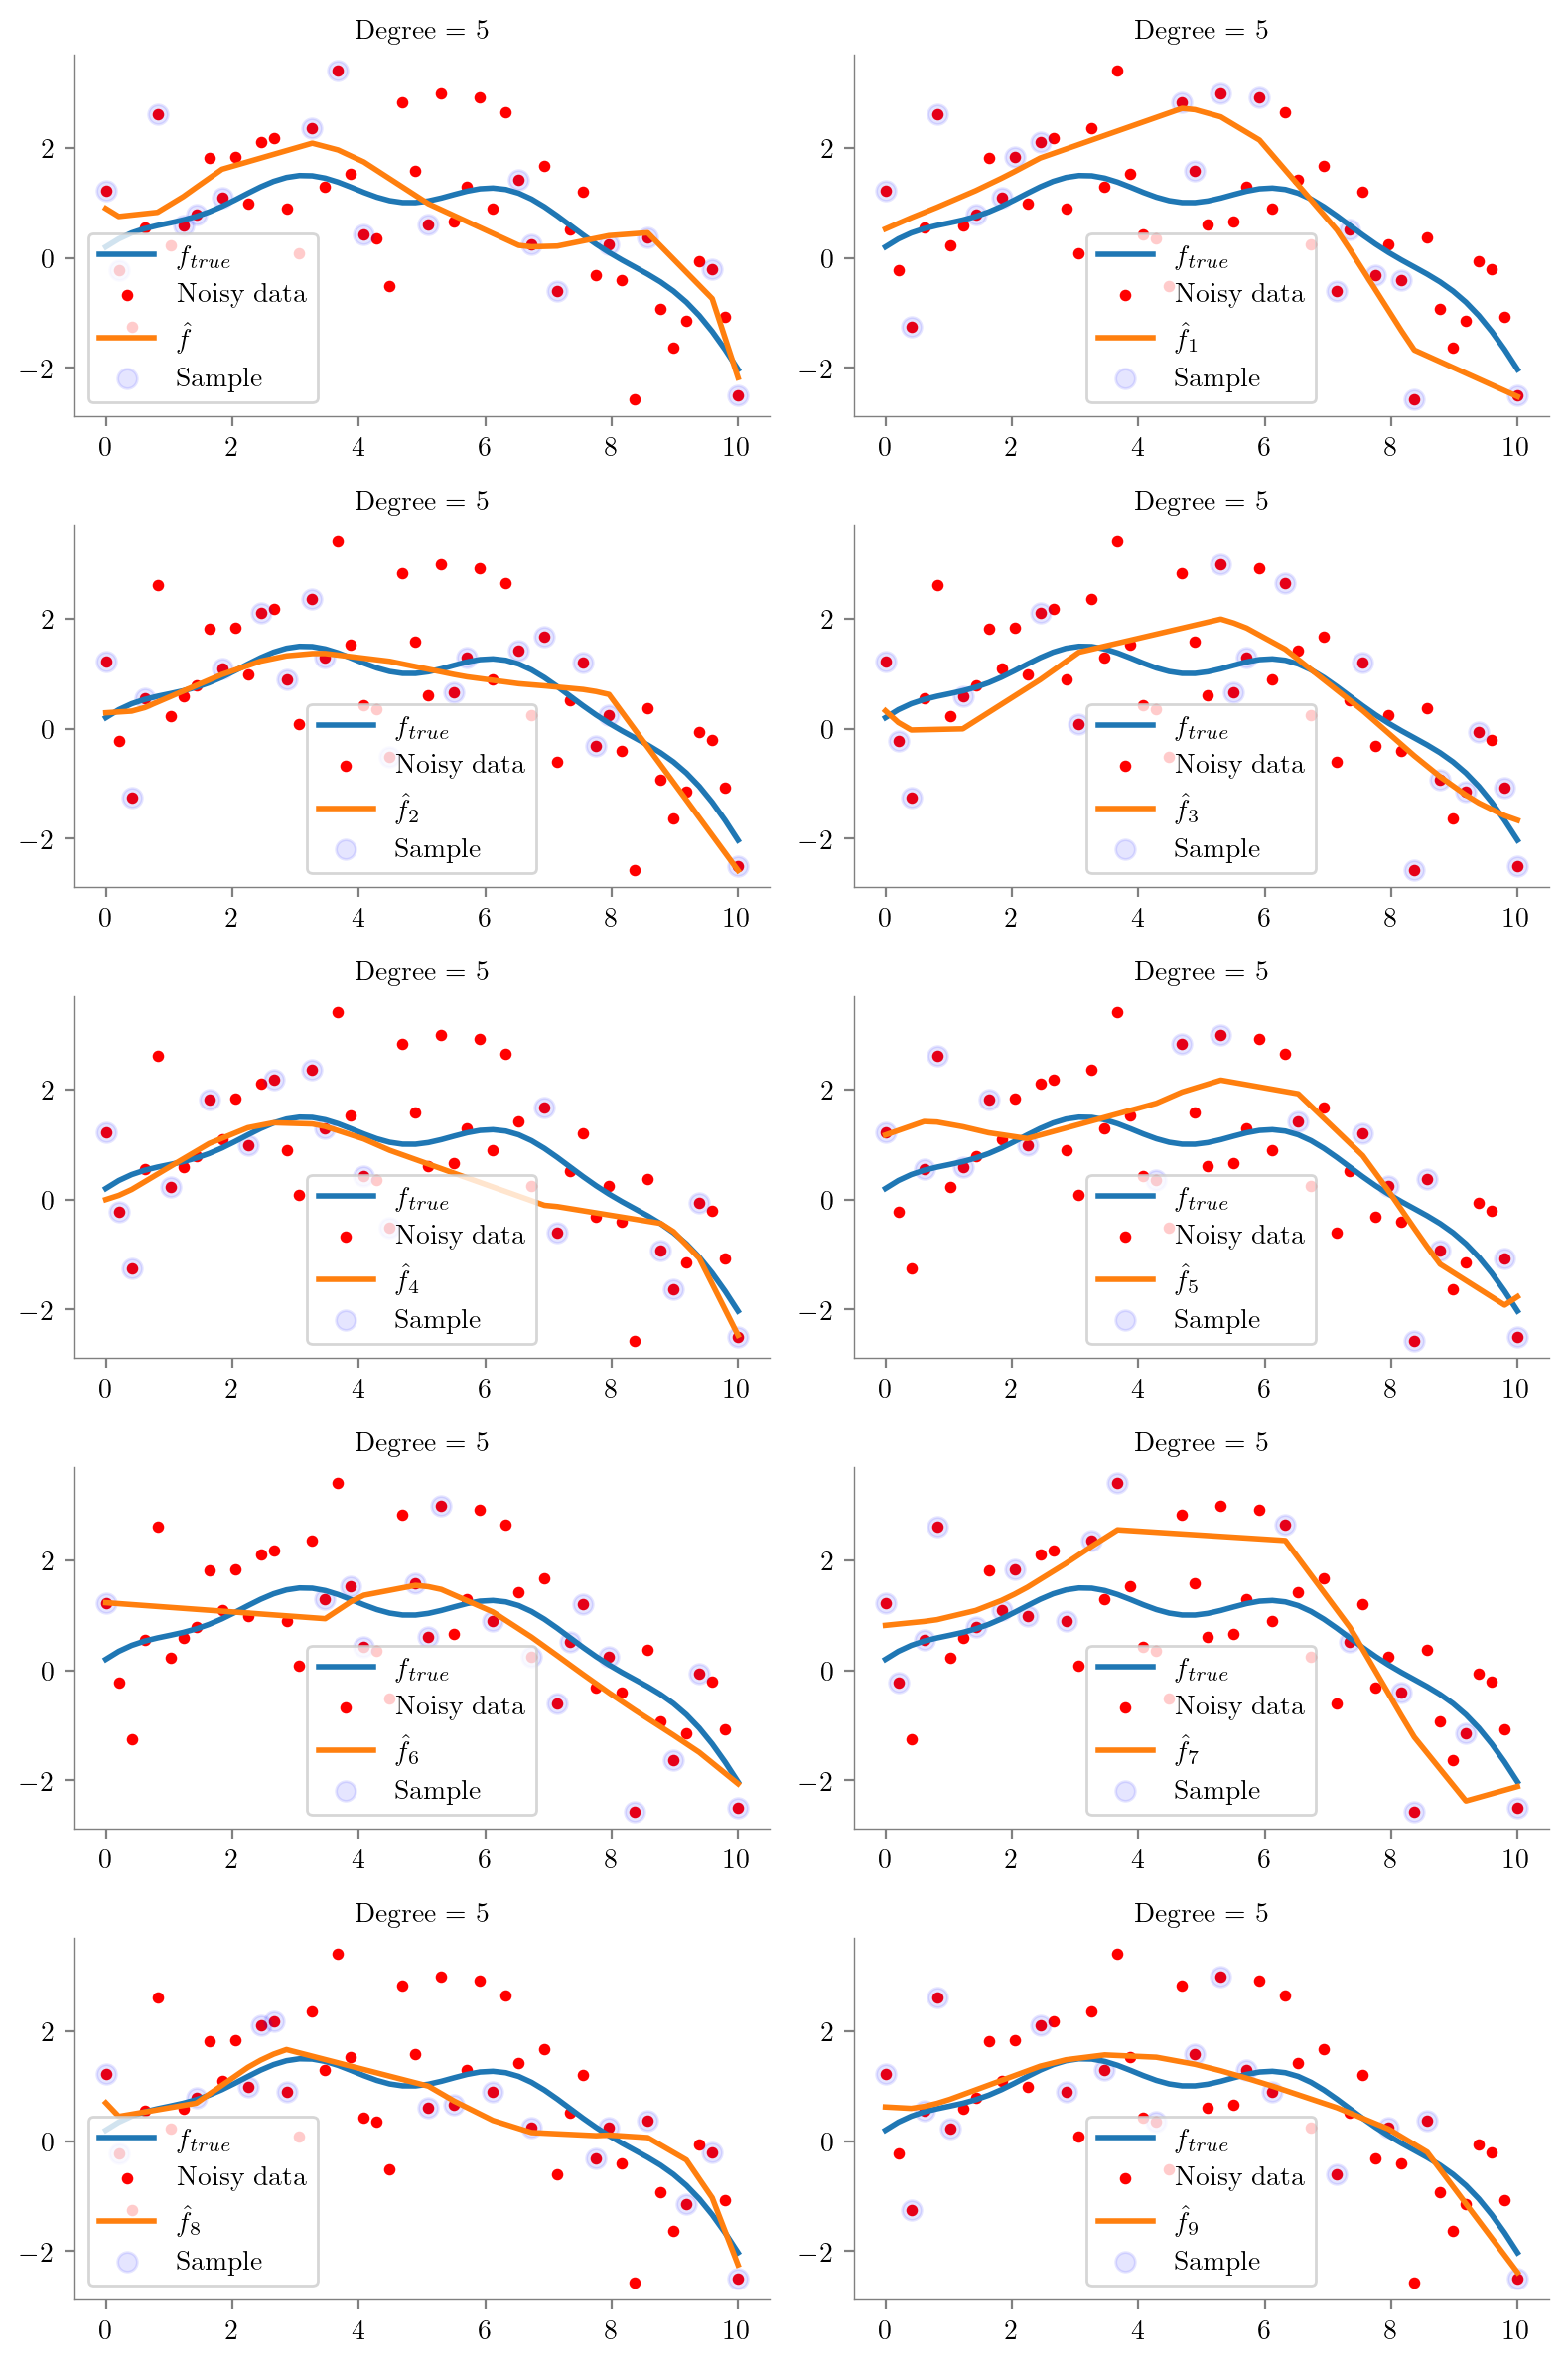

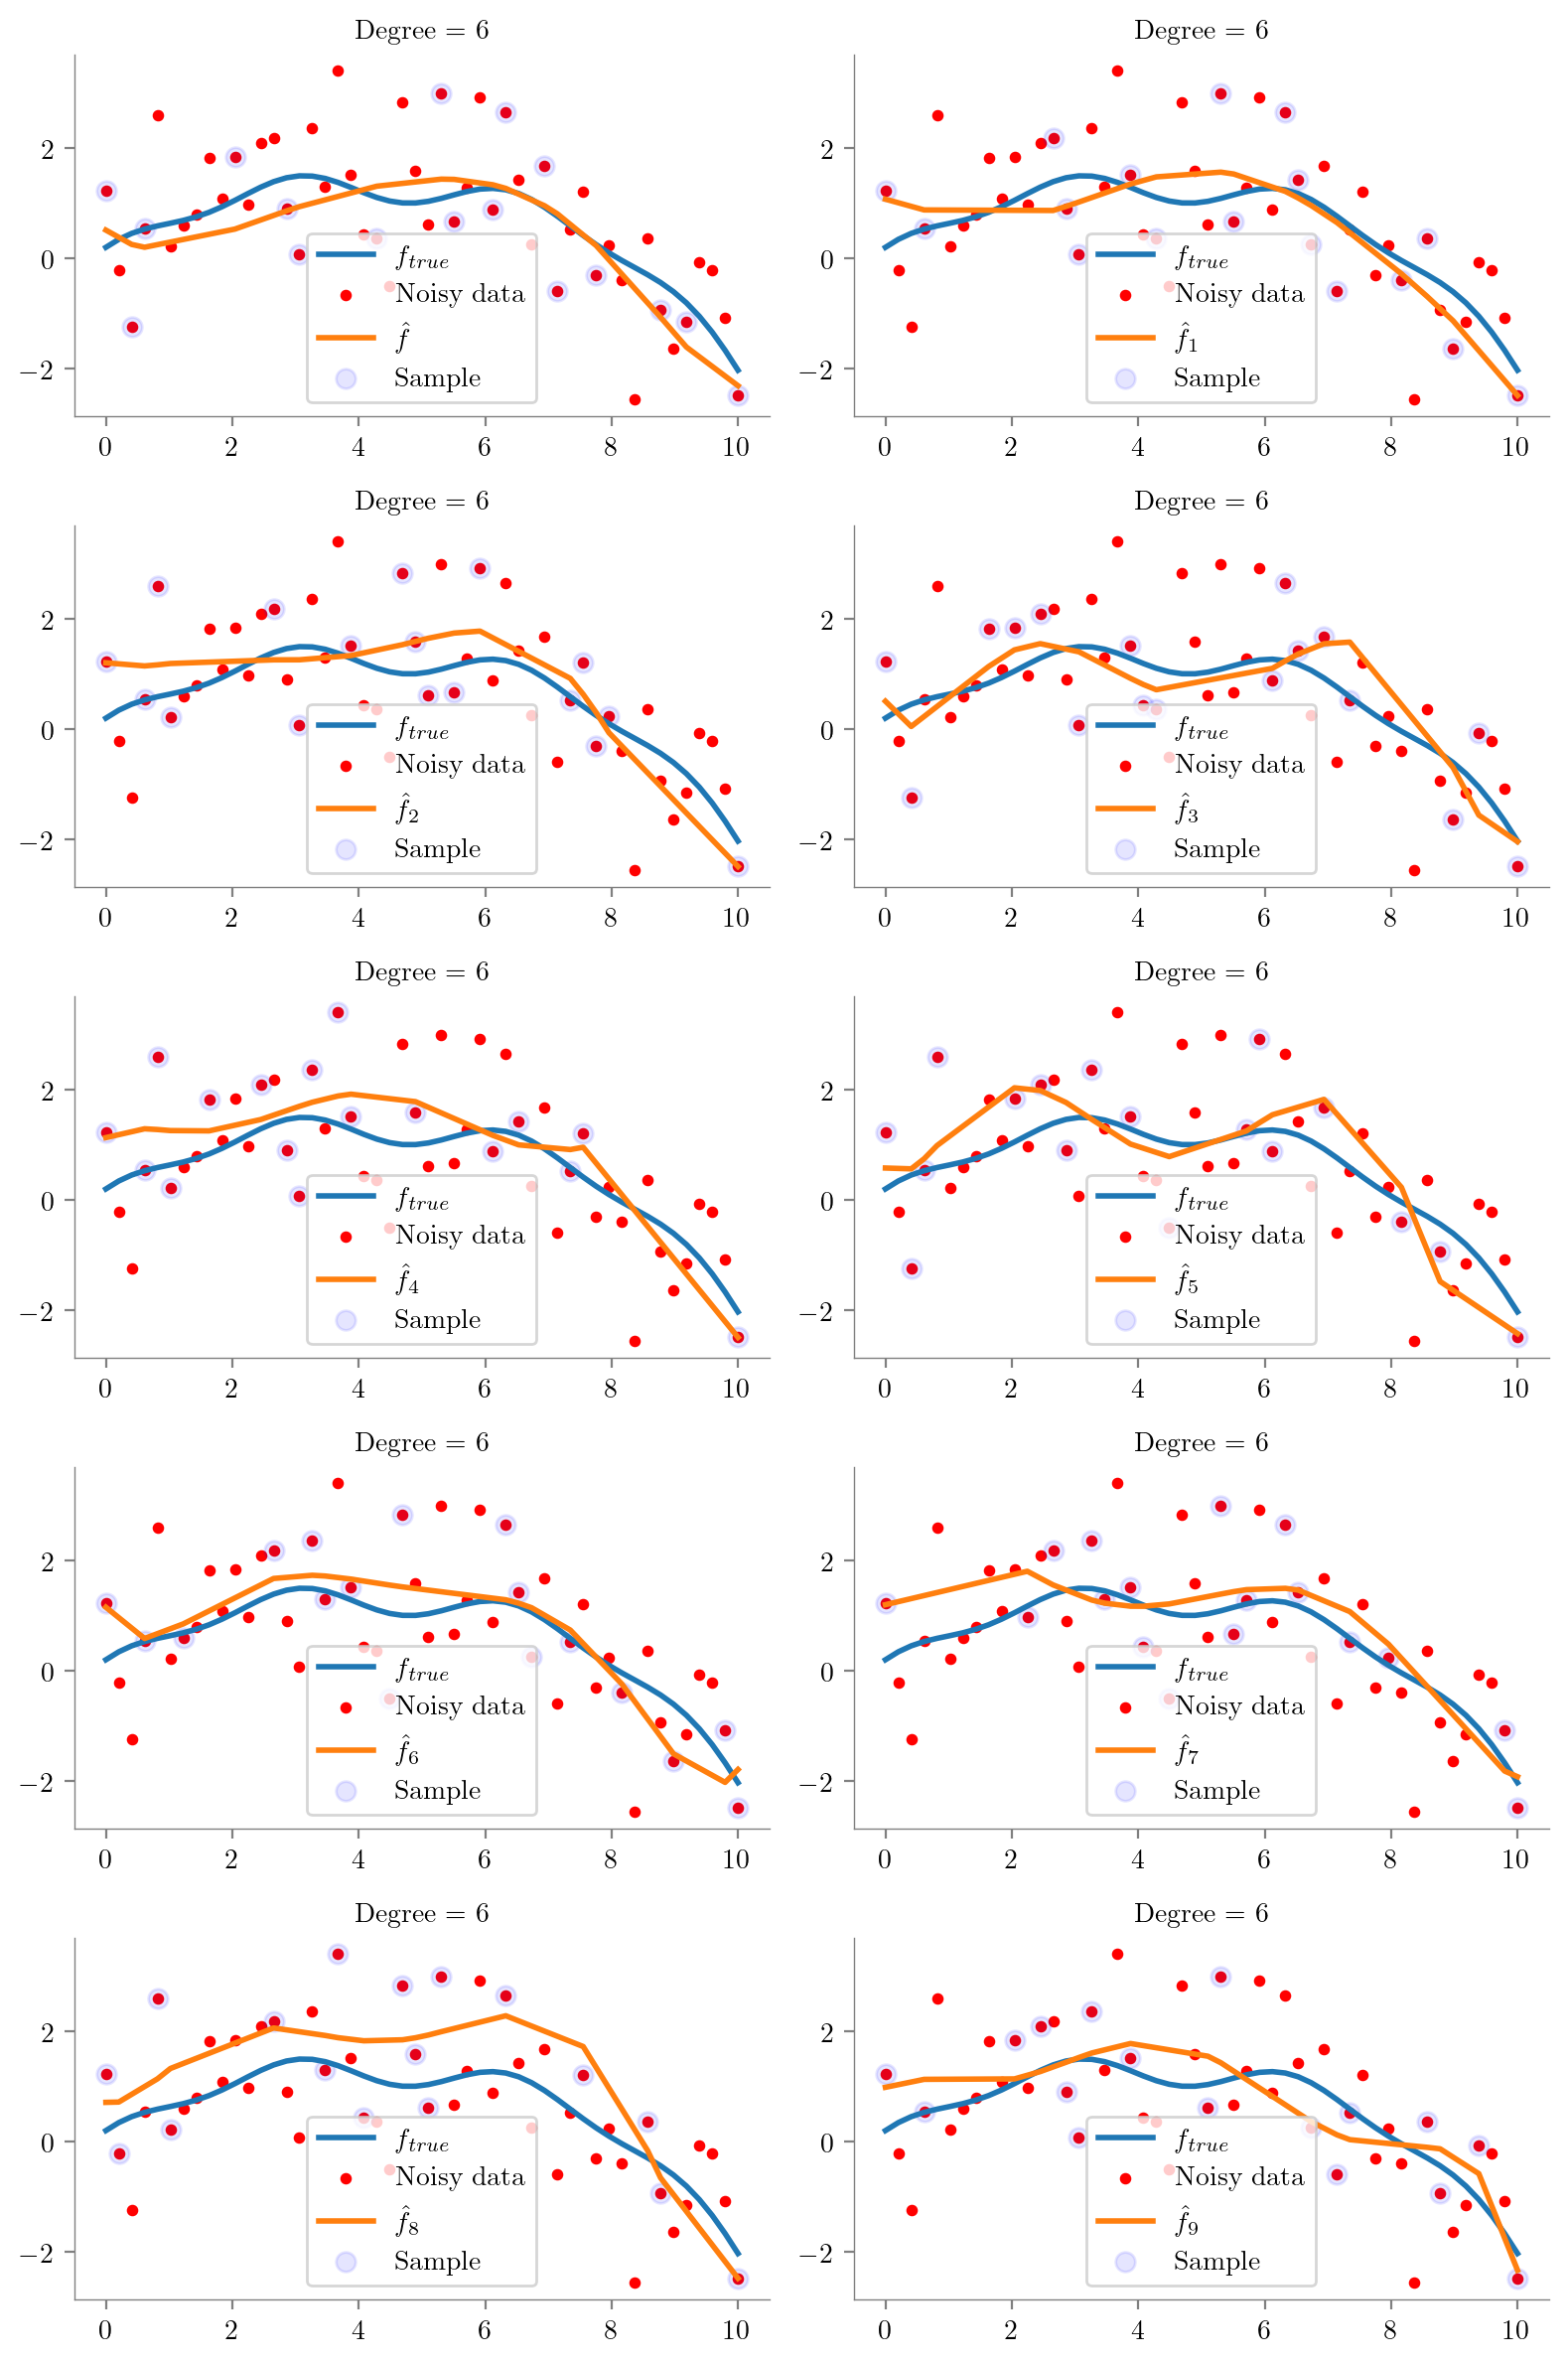

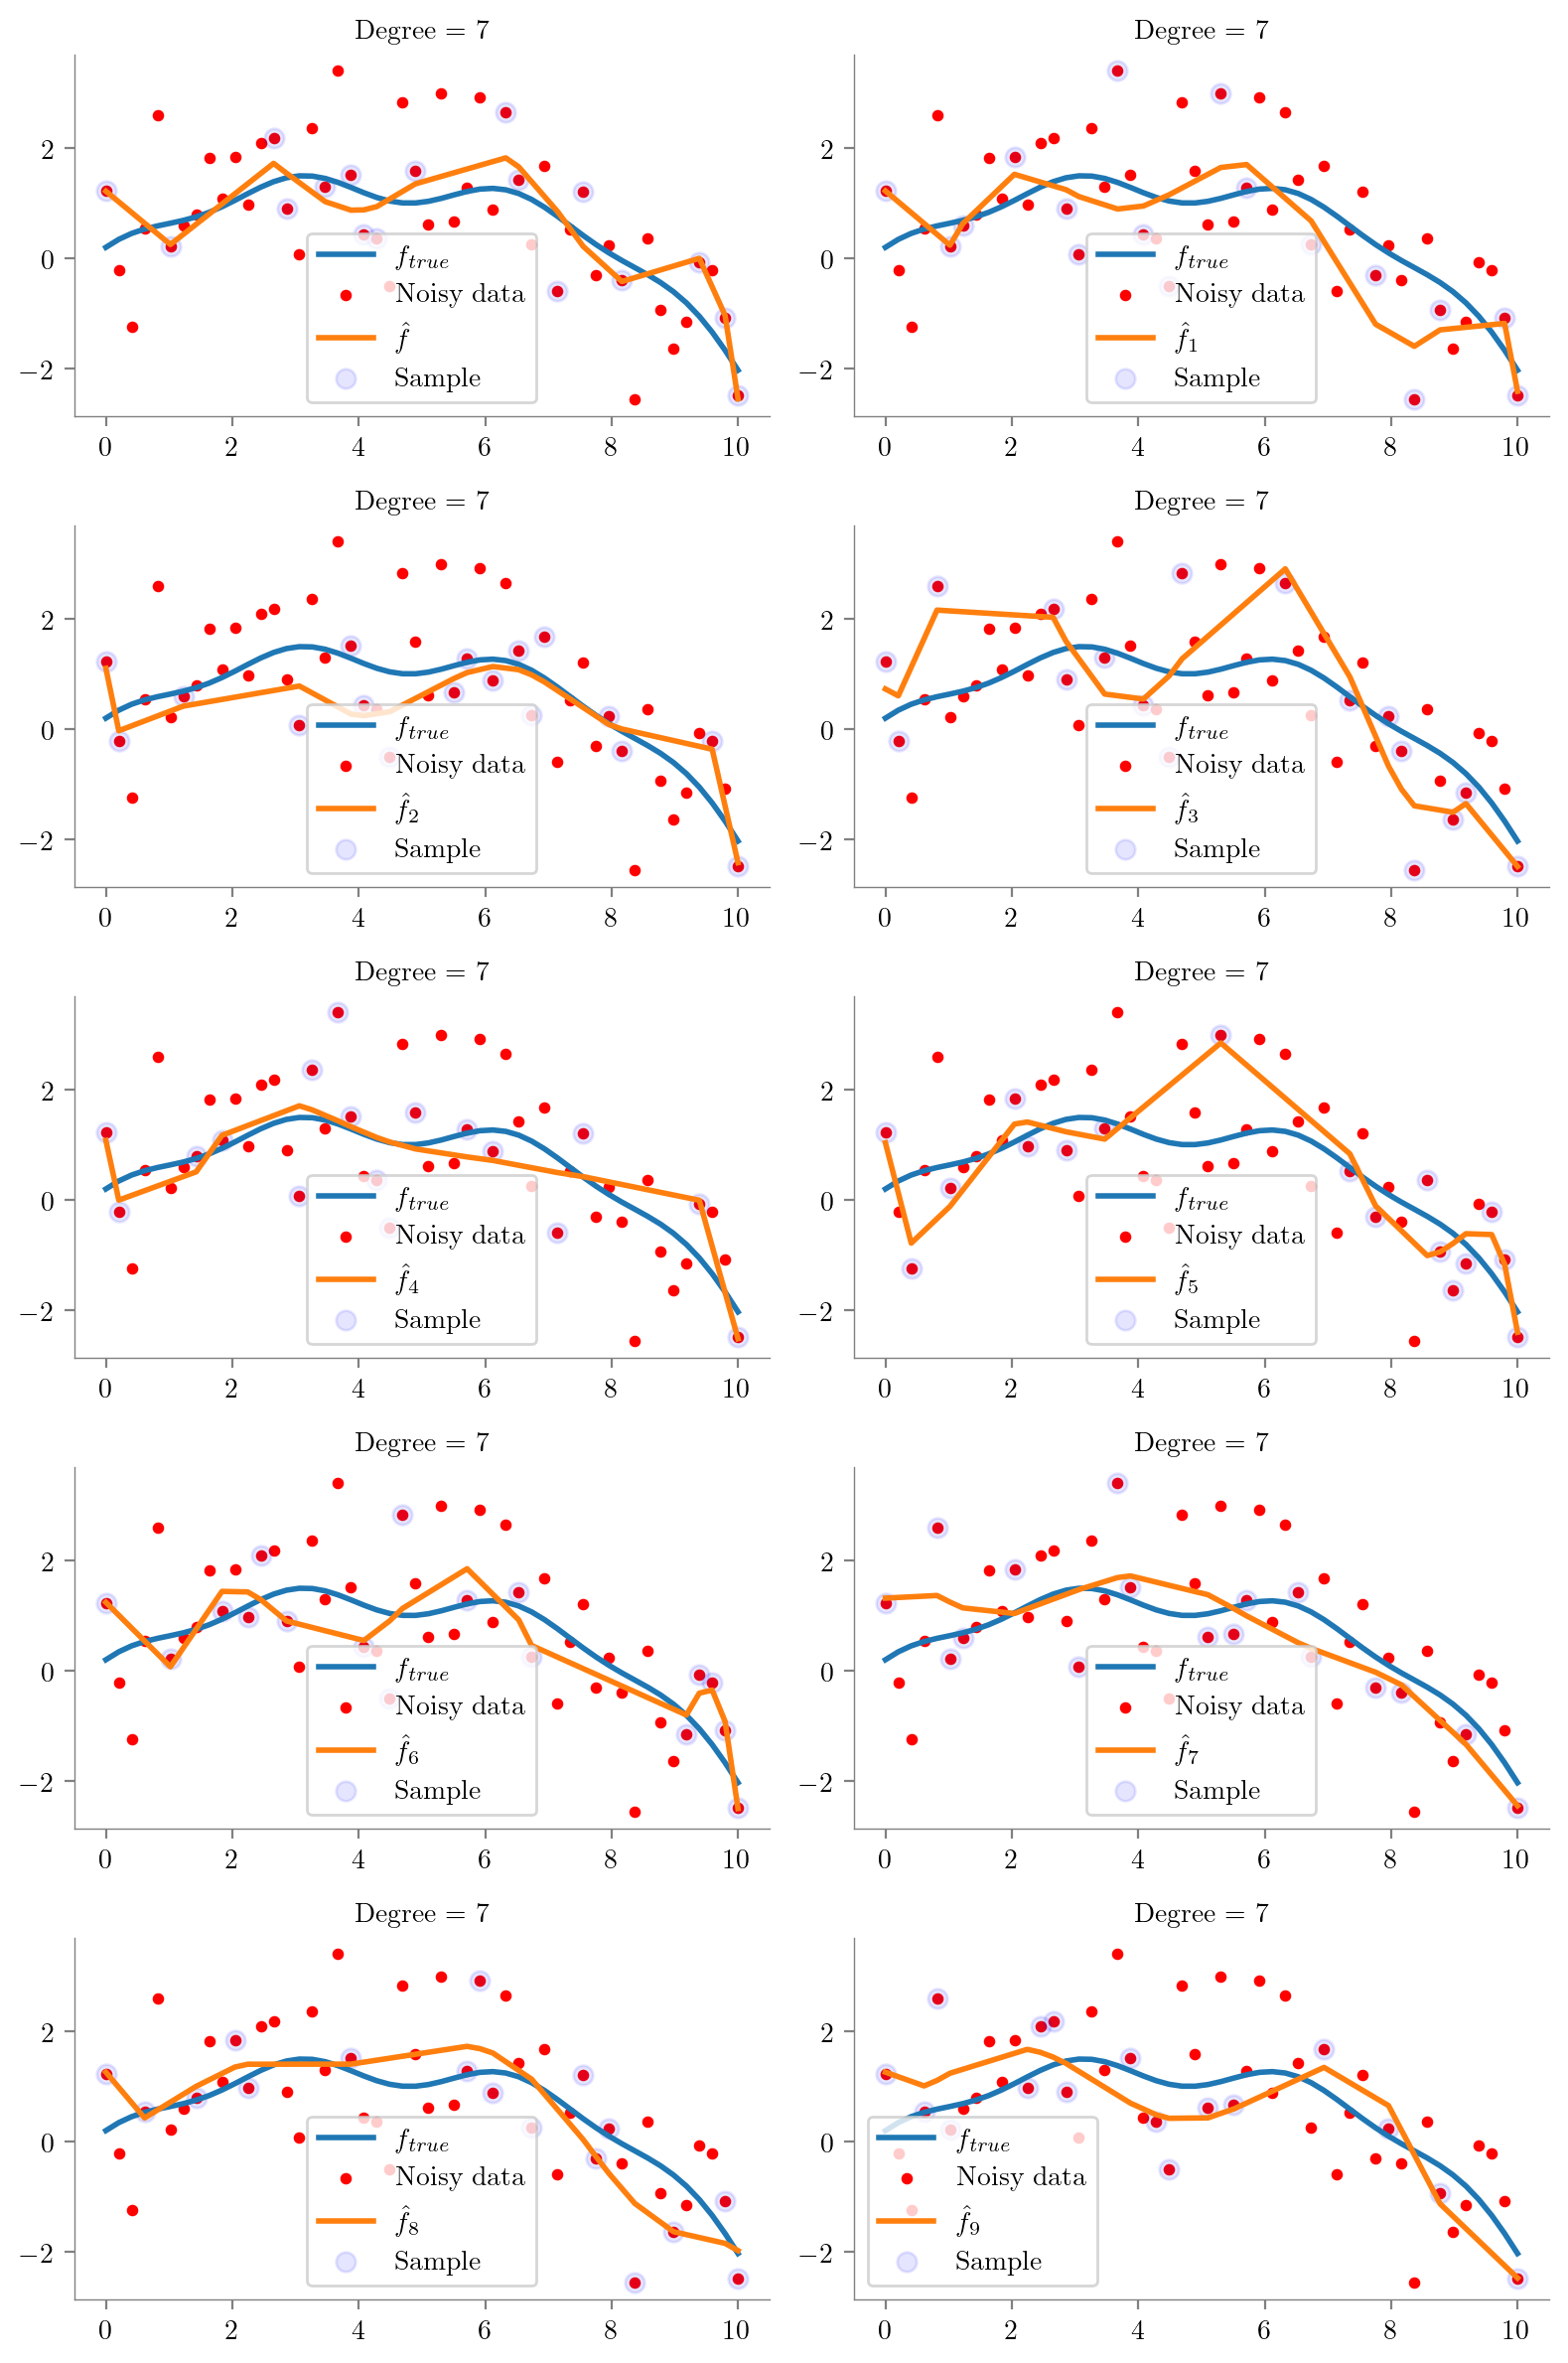

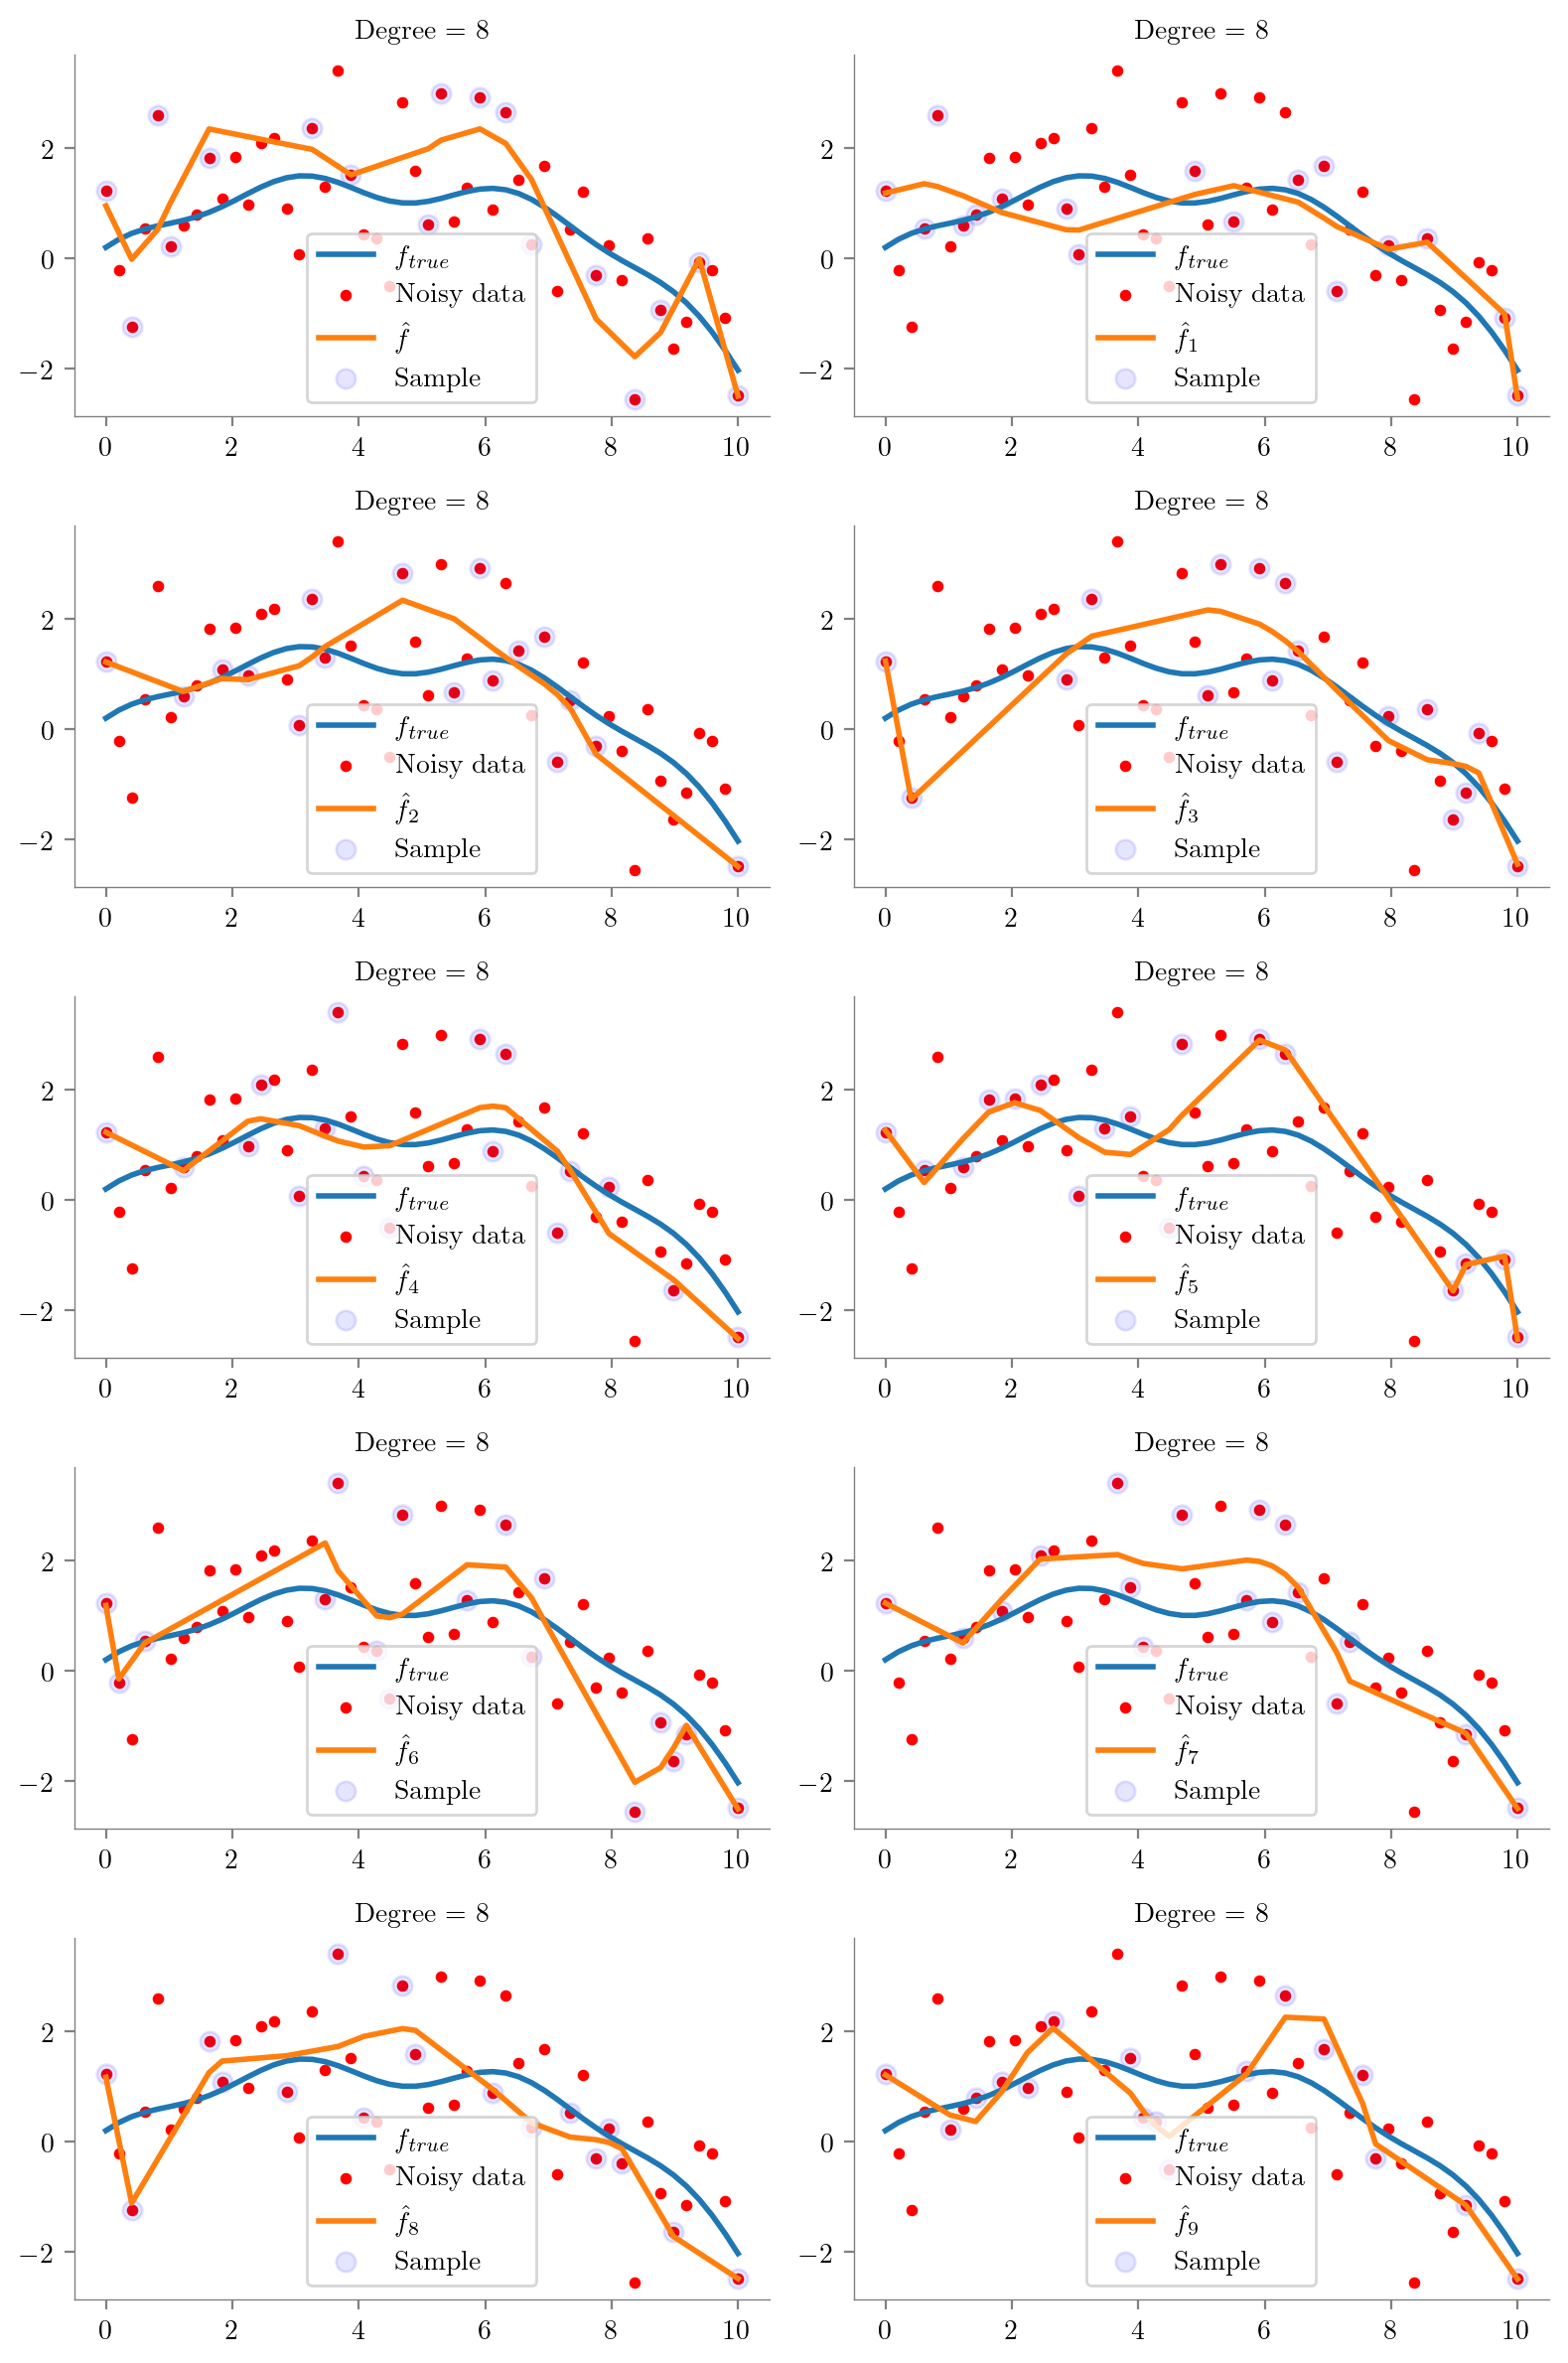

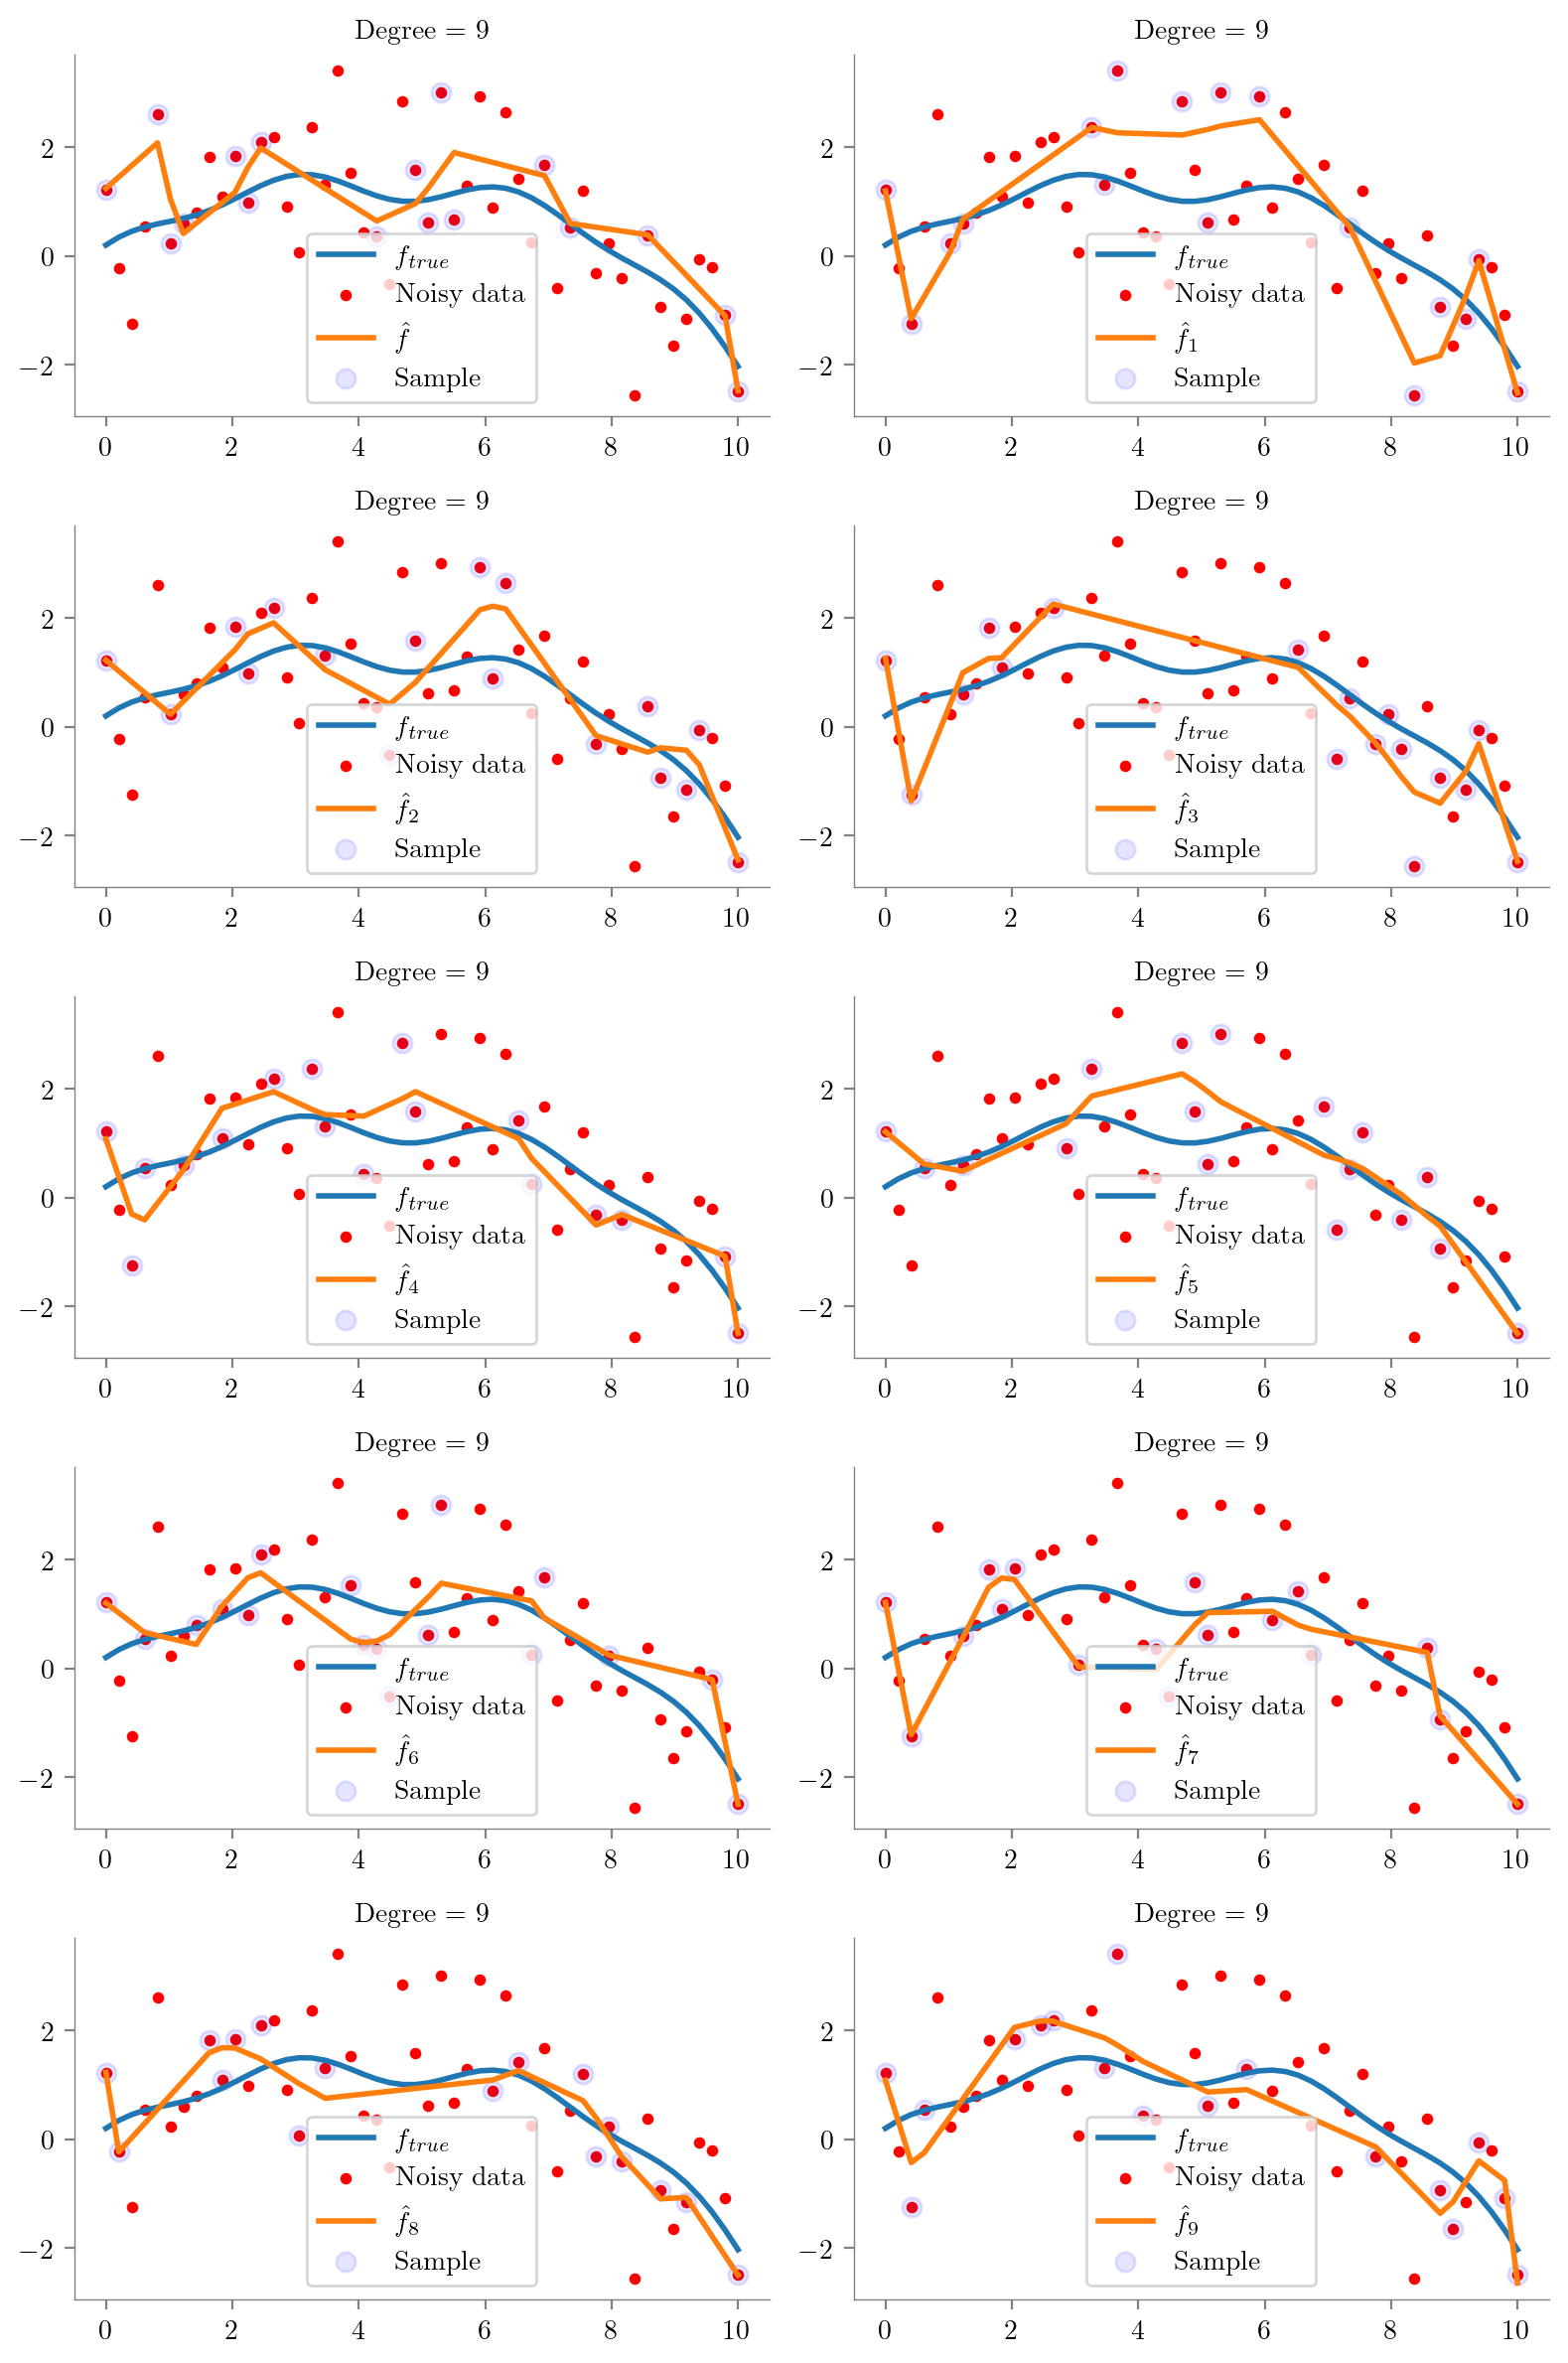

In [223]:
regs = {}
for i in range(0, 10):
    regs[i] = plot_degree(i)

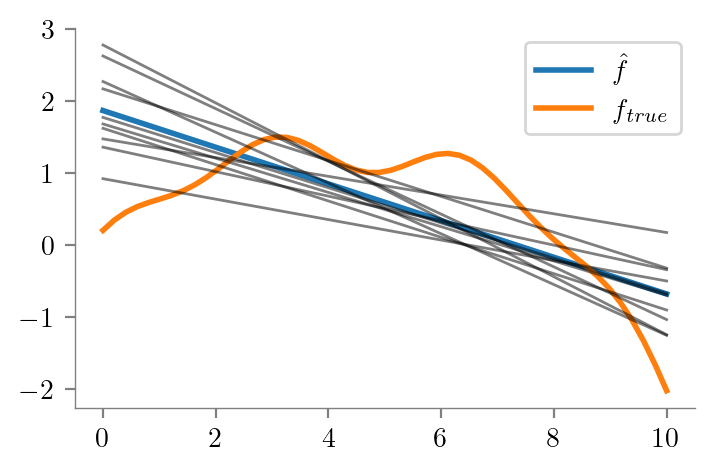

In [225]:
def plot_predictions(reg):
    x_test = np.linspace(0, 10, 50)
    y_pred = np.zeros((10, 50))
    for i in range(10):
        y_pred[i] = reg[i].predict(x_test.reshape(-1, 1))
    plt.plot(x_test, y_pred.mean(axis=0), label = r'$\hat{f}$', lw=2)
    plt.plot(x_test, f_x, label = r'$f_{true}$', lw=2)
    plt.plot(x_test, y_pred.T, lw=1, c='k', alpha=0.5)  
    format_axes(plt.gca())
    plt.legend()

plot_predictions(regs[1])

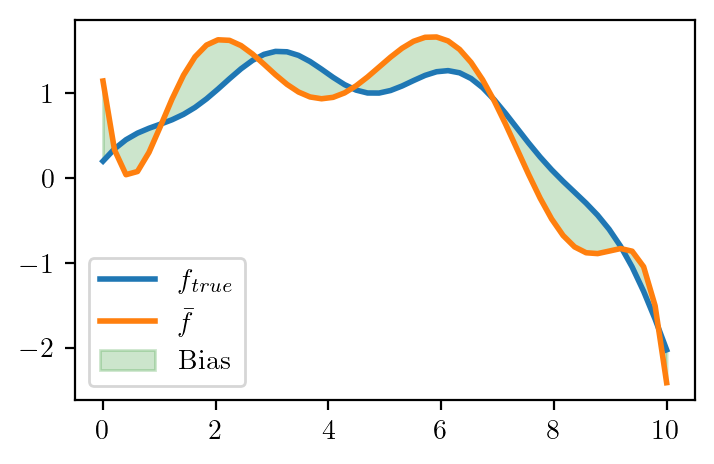

In [226]:
def plot_bias(reg):
    x_test = np.linspace(0, 10, 50)
    y_pred = np.zeros((10, 50))
    for i in range(10):
        y_pred[i] = reg[i].predict(x_test.reshape(-1, 1))
    y_pred_mean = np.mean(y_pred, axis=0)
    y_pred_var = np.var(y_pred, axis=0)

    plt.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    #plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    plt.plot(x_test, y_pred_mean, label = r'$\bar{f}$', lw=2)
    plt.fill_between(x_test, y_pred_mean, f_x, alpha=0.2, color='green', label = 'Bias')
    plt.legend()

plot_bias(regs[7])

In [227]:
def plot_variance(reg):
    x_test = np.linspace(0, 10, 50)
    y_pred = np.zeros((10, 50))
    for i in range(10):
        y_pred[i] = reg[i].predict(x_test.reshape(-1, 1))
    y_pred_mean = np.mean(y_pred, axis=0)
    y_pred_var = np.var(y_pred, axis=0)

    plt.plot(x_overall, f_x, label = r'$f_{true}$', lw=2)
    #plt.scatter(x_overall, y_overall, s=10, c='r', label = 'Noisy data')
    plt.plot(x_test, y_pred_mean, label = r'$\bar{f}$', lw=2)
    plt.fill_between(x_test, y_pred_mean - y_pred_var, y_pred_mean + y_pred_var, alpha=0.2, color='red', label = 'Variance')
    plt.legend()


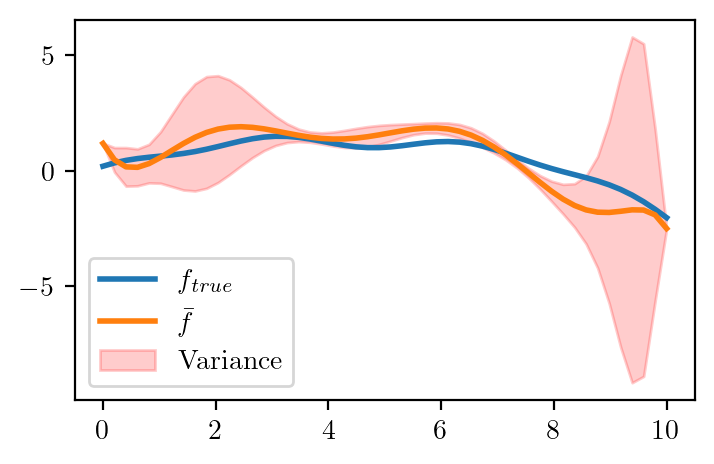

In [228]:
plot_variance(regs[8])

In [229]:
# Plot bias^2 and variance for different depths as bar plot

def plot_bias_variance(reg):
    x_test = np.linspace(0, 10, 50)
    y_pred = np.zeros((10, 50))
    for i in range(10):
        y_pred[i] = reg[i].predict(x_test.reshape(-1, 1))
    y_pred_mean = np.mean(y_pred, axis=0)
    y_pred_var = np.var(y_pred, axis=0)

    bias = (y_pred_mean - f_x)**2
    var = y_pred_var
    return bias.sum(), var.sum()

In [230]:
bs = {}
vs = {}
for i in range(1, 8):
    bs[i], vs[i] = plot_bias_variance(regs[i])

In [231]:
df = pd.DataFrame({'Bias': bs, 'Variance': vs})


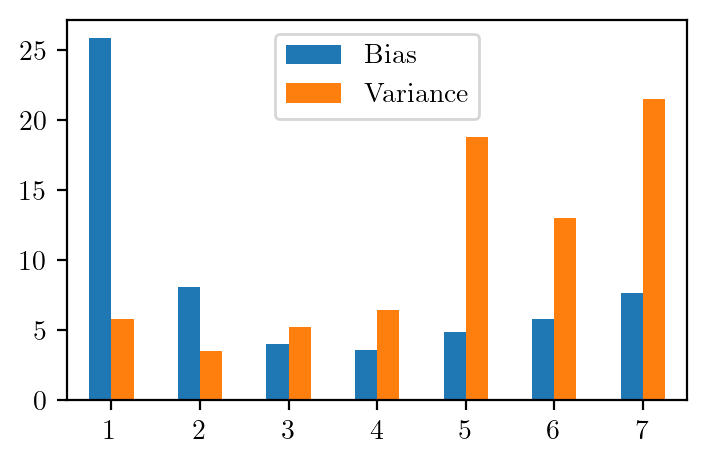

In [232]:
df.plot.bar(rot=0)